# Finding connections between rebounds and height/age

## Data loading, processing, feaurure engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data\player_bios3.csv')
#df_save = df.copy()

In [6]:
career_f = pd.read_csv('data\career_filtered.csv')
career_f_save = career_f.copy()
df[0:5]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON_ID
0,1630639,A.J. Lawson,1610612742,DAL,22.0,6-6,78.0,179.0,South Carolina,Canada,...,56,21,2,-20.1,0.046,0.152,0.189,0.589,0.032,2022-23
1,1631260,AJ Green,1610612749,MIL,23.0,6-5,77.0,190.0,Northern Iowa,USA,...,154,45,22,-4.9,0.016,0.105,0.159,0.607,0.092,2022-23
2,1631100,AJ Griffin,1610612737,ATL,19.0,6-6,78.0,220.0,Duke,USA,...,639,153,73,1.5,0.026,0.080,0.174,0.577,0.070,2022-23
3,203932,Aaron Gordon,1610612743,DEN,27.0,6-8,80.0,235.0,Arizona,USA,...,1109,446,203,12.1,0.086,0.136,0.206,0.617,0.129,2022-23
4,1628988,Aaron Holiday,1610612737,ATL,26.0,6-0,72.0,185.0,UCLA,USA,...,247,74,89,0.9,0.028,0.059,0.129,0.528,0.135,2022-23


## Statistical analysis

In [33]:
import scipy.stats as stats
from scipy.stats import lognorm, kstest
import statsmodels.api as sm

In [30]:
data = pd.read_csv('data\data_combined.csv')
data

,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
0,1630639,2022-23,22.0,78.0,179.0,0.046,0.152,0.589,217.0,0.405530,0.662667,0.230415,0.266667,0.018433,0.000000,0.101382
1,1631260,2022-23,23.0,77.0,190.0,0.016,0.105,0.607,345.0,0.362319,0.424000,0.304348,0.419000,0.011594,0.000000,0.089855
2,203932,2022-23,27.0,80.0,235.0,0.086,0.136,0.617,2055.0,0.370316,0.564000,0.084185,0.347000,0.092944,0.024818,0.062774
3,1628988,2022-23,26.0,72.0,185.0,0.028,0.059,0.528,845.0,0.260355,0.418000,0.104142,0.409000,0.031953,0.014201,0.093491
4,1630174,2022-23,23.0,77.0,215.0,0.033,0.119,0.566,1816.0,0.324890,0.427000,0.172907,0.366000,0.065529,0.018722,0.129405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,1626195,2019-20,26.0,83.0,250.0,0.105,0.243,0.576,375.0,0.370667,0.532000,0.058667,0.227000,0.098667,0.018667,0.085333
8318,201163,2019-20,33.0,80.0,235.0,0.014,0.164,0.531,734.0,0.249319,0.404000,0.164850,0.306000,0.027248,0.016349,0.107629
8319,1627812,2019-20,27.0,72.0,178.0,0.011,0.085,0.528,530.0,0.354717,0.420000,0.149057,0.304000,0.067925,0.007547,0.071698
8320,1628380,2019-20,22.0,83.0,250.0,0.095,0.149,0.538,290.0,0.234483,0.471000,0.065517,0.368000,0.020690,0.017241,0.124138


In [28]:
players = (df.copy()).sample(frac=1).reset_index(drop=True)
players = players.drop_duplicates(subset=['PLAYER_ID', 'PLAYER_NAME'], keep='first').reset_index(drop=True)
players



,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON_ID
0,1630169,Tyrese Haliburton,1610612758,SAC,21.0,6-5,77.0,185.0,Iowa State,USA,...,753,173,309,-5.6,0.022,0.076,0.175,0.585,0.247,2020-21
1,2572,Josh Howard,1610612742,DAL,25.0,6-7,79.0,210.0,Wake Forest,USA,...,958,484,109,8.9,0.071,0.125,0.182,0.535,0.069,2004-05
2,200749,Shelden Williams,1610612751,NJN,28.0,6-9,81.0,250.0,Duke,USA,...,268,350,35,-9.2,0.111,0.174,0.112,0.543,0.044,2011-12
3,1626168,Trey Lyles,1610612758,SAC,26.0,6-9,81.0,234.0,Kentucky,Canada,...,786,379,88,-7.2,0.056,0.189,0.205,0.588,0.090,2021-22
4,1863,Earl Boykins,1610612743,DEN,29.0,5-5,65.0,133.0,Eastern Michigan,USA,...,1015,143,372,1.2,0.017,0.050,0.214,0.530,0.293,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,101238,Boniface Ndong,1610612746,LAC,28.0,7-0,84.0,205.0,NaN,Senegal,...,50,37,7,-14.4,0.096,0.169,0.179,0.439,0.080,2005-06
2073,2486,Maurice Baker,1610612757,POR,25.0,6-2,74.0,200.0,Oklahoma State,USA,...,0,2,1,29.9,0.056,0.045,0.048,0.000,0.077,2004-05
2074,200799,Guillermo Diaz,1610612746,LAC,23.0,6-2,74.0,185.0,Miami,USA,...,5,2,1,10.8,0.105,0.000,0.143,0.403,0.071,2007-08
2075,2867,Kasib Powell,1610612748,MIA,27.0,6-7,79.0,215.0,Texas Tech,USA,...,84,44,18,-13.6,0.027,0.119,0.167,0.424,0.129,2007-08


In [113]:
data_players_randomseason = (data.copy()).sample(frac=1).reset_index(drop=True)
data_players_randomseason = data_players_randomseason.drop_duplicates(subset=['PLAYER_ID', ], keep='first').reset_index(drop=True)
data_players_randomseason


,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
0,201563,2015-16,27.0,82.0,235.0,0.073,0.173,0.563,363.0,0.564738,0.522,0.024793,0.333000,0.104683,0.024793,0.107438
1,468,2003-04,34.0,77.0,210.0,0.021,0.089,0.535,1101.0,0.269755,0.404,0.125341,0.370000,0.054496,0.007266,0.059946
2,1628989,2020-21,22.0,79.0,190.0,0.017,0.090,0.541,2126.0,0.343838,0.432,0.181562,0.363000,0.023518,0.008467,0.077611
3,2754,2016-17,35.0,76.0,213.0,0.086,0.123,0.493,1914.0,0.310867,0.461,0.028213,0.278000,0.041797,0.015152,0.092999
4,203110,2018-19,29.0,79.0,230.0,0.031,0.180,0.526,2065.0,0.204358,0.445,0.079903,0.285000,0.030508,0.033898,0.095400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,101152,2006-07,22.0,75.0,201.0,0.037,0.084,0.493,190.0,0.315789,0.400,0.105263,0.300000,0.068421,0.005263,0.031579
1663,202068,2009-10,24.0,79.0,230.0,0.043,0.124,0.487,222.0,0.387387,0.254,0.252252,0.222333,0.027027,0.018018,0.126126
1664,1629833,2021-22,26.0,76.0,200.0,0.042,0.090,0.410,349.0,0.318052,0.306,0.206304,0.292000,0.017192,0.002865,0.083095
1665,2415,2004-05,25.0,80.0,235.0,0.149,0.135,0.428,317.0,0.324921,0.408,0.006309,0.000000,0.056782,0.003155,0.110410


Text(0.5, 1.0, 'Player Height Distribution')

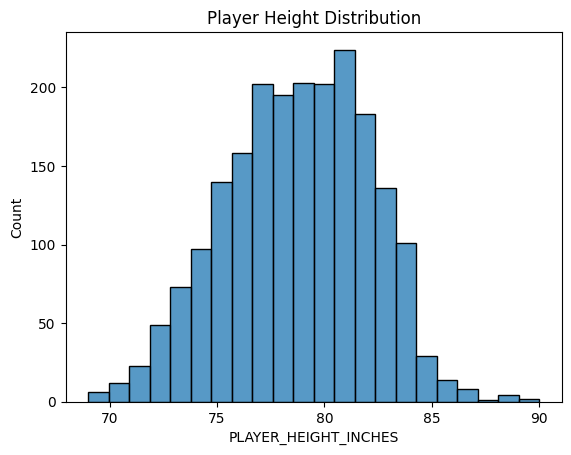

In [115]:
sns.histplot(data=players, x="PLAYER_HEIGHT_INCHES", bins=len(players['PLAYER_HEIGHT_INCHES'].unique()))
plt.title('Player Height Distribution')

<Axes: xlabel='PLAYER_HEIGHT_INCHES', ylabel='Count'>

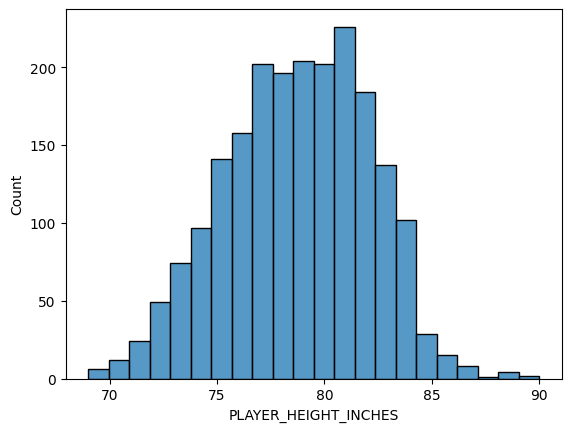

In [37]:
players = players[players['PLAYER_HEIGHT_INCHES'] > 68]
sns.histplot(data=players, x="PLAYER_HEIGHT_INCHES", bins=len(players['PLAYER_HEIGHT_INCHES'].unique()))


In [84]:
players = players[players['AGE'] < 39]
players['AGE'].unique()

array([21., 25., 28., 26., 30., 29., 22., 27., 24., 36., 33., 31., 20.,
       23., 32., 34., 35., 19., 37., 18., 38.])

In [54]:
#Find the cdf of the heights
heights = players['PLAYER_HEIGHT_INCHES'].unique()
heights.sort()
heights_cdf = []
for i in heights:
    heights_cdf.append(len(players[players['PLAYER_HEIGHT_INCHES'] <= i])/len(players))
heights_cdf
#Find loc, scale, and shape of the normal distribution
loc, scale = stats.norm.fit(players['PLAYER_HEIGHT_INCHES'])
shape = scale/loc

#Create a normal distribution with the same loc, scale
norm_dist = stats.norm(loc=loc, scale=scale)

kstest(players['PLAYER_HEIGHT_INCHES'], norm_dist.cdf)

KstestResult(statistic=0.08369598851497095, pvalue=4.418383122260875e-13, statistic_location=81.0, statistic_sign=-1)

In [56]:
#Try to fit a lognormal distribution
shape, loc, scale = stats.lognorm.fit(players['PLAYER_HEIGHT_INCHES'])
lognorm_dist = stats.lognorm(s=shape, loc=loc, scale=scale)
kstest(players['PLAYER_HEIGHT_INCHES'], lognorm_dist.cdf)

KstestResult(statistic=0.08369706336965066, pvalue=4.415075266612903e-13, statistic_location=81.0, statistic_sign=-1)

KstestResult(statistic=0.007064921553617598, pvalue=0.6976273843392744, statistic_location=78.789, statistic_sign=1)

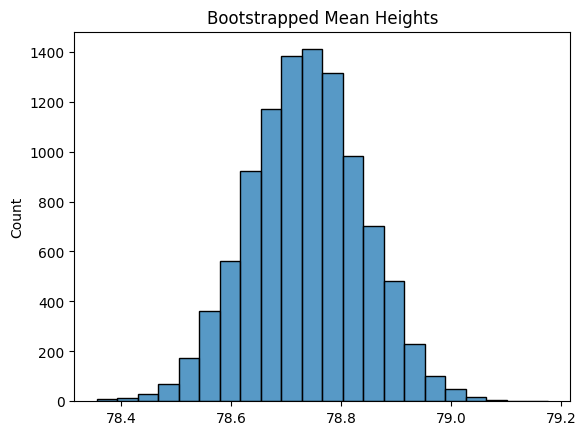

In [114]:
# Bootstrap the entire dataframe
players_boot = players.sample(n=10000, replace=True)

# Now you can calculate the mean height from the bootstrapped dataframe
heights_boot = []
for i in range(10000):
    heights_boot.append(players_boot['PLAYER_HEIGHT_INCHES'].sample(n=1000).mean())
heights_boot = np.array(heights_boot)
heights_boot.sort()

# Plot the histogram of the bootstrapped means
sns.histplot(data=heights_boot, bins=len(players_boot['PLAYER_HEIGHT_INCHES'].unique()))
plt.title('Bootstrapped Mean Heights')

kstest(heights_boot, 'norm', args=(heights_boot.mean(), heights_boot.std()))

In [87]:
def plot_A_by_B(data=players, A='AGE', B='PLAYER_HEIGHT_INCHES'):
    x = sorted(data[B].unique())
    y = [data[data[B]==i][A].mean() for i in x] 

    plt.plot(x, y, color='black')
    plt.title(A + ' by ' + B)
    plt.xlabel(B)
    plt.ylabel(A)

def plot_A_by_B_and_C(data=players, A='OREB_PCT', B='PLAYER_HEIGHT_INCHES', C='AGE'):
    x1 = sorted(data[B].unique())
    x2 = sorted(data[C].unique())
    y1 = [data[data[B]==i][A].mean() for i in x1]
    y2 = [data[data[C]==i][A].mean() for i in x2]
    fig, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(10, 6))
    sns.lineplot(x=x1, y=y1, ax=ax[0])
    sns.lineplot(x=x2, y=y2, ax=ax[1])
    ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box'); ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')
    ax[0].set_title(A + ' by ' + B);ax[1].set_title(A + ' by ' + C)
    ax[0].set_xlabel(B);ax[1].set_xlabel(C);ax[0].set_ylabel(A);ax[1].set_ylabel(A)

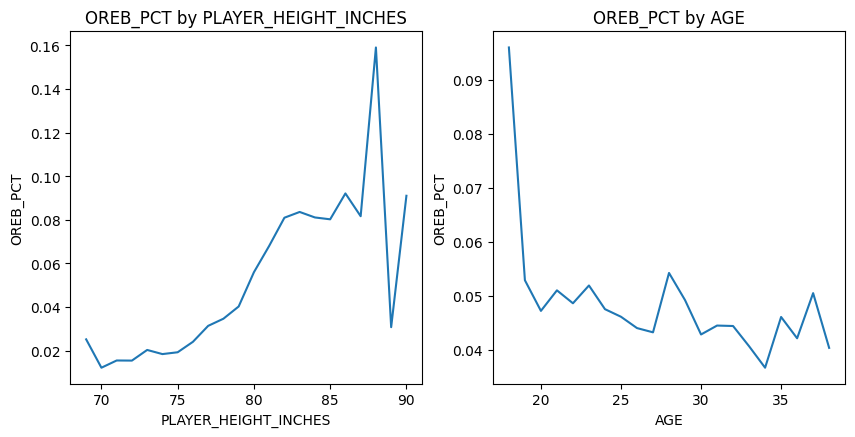

In [88]:
plot_A_by_B_and_C()

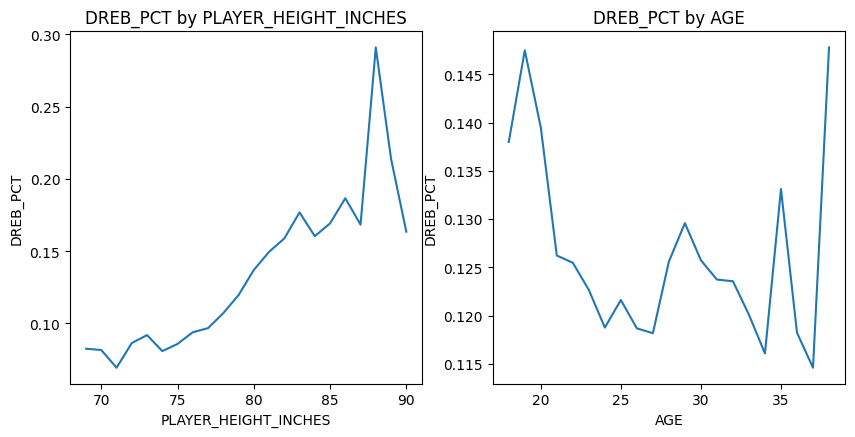

In [100]:
plot_A_by_B_and_C(A='DREB_PCT', B='PLAYER_HEIGHT_INCHES', C='AGE')

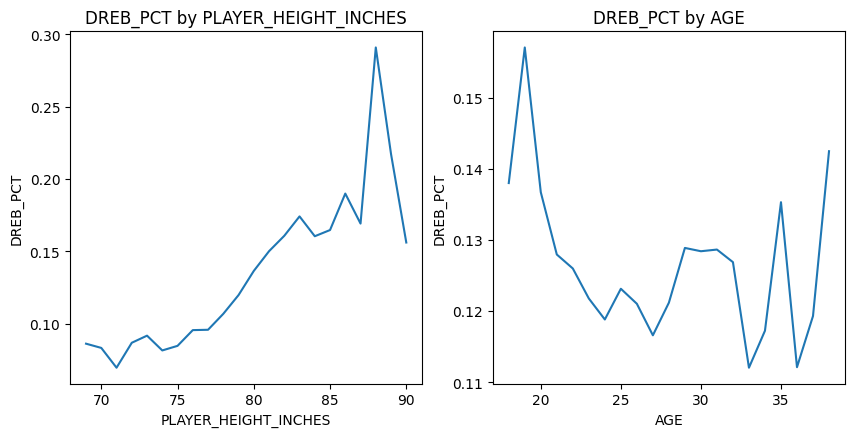

In [255]:
plot_A_by_B_and_C(data = players_boot, A='DREB_PCT', B='PLAYER_HEIGHT_INCHES', C='AGE')

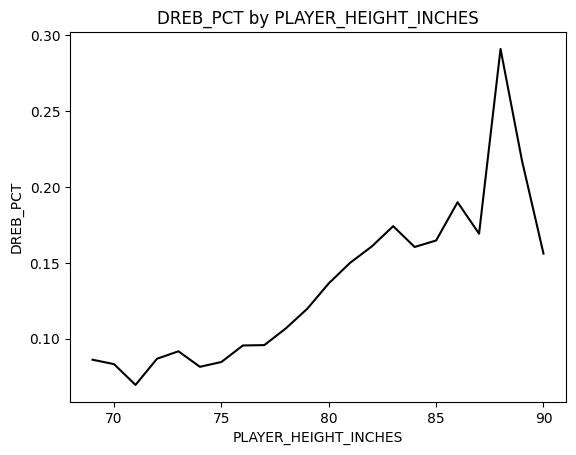

In [118]:
plot_A_by_B(data=players_boot, A='DREB_PCT', B='PLAYER_HEIGHT_INCHES')

### Do taller players get more rebounds?

c:\Users\hanic\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


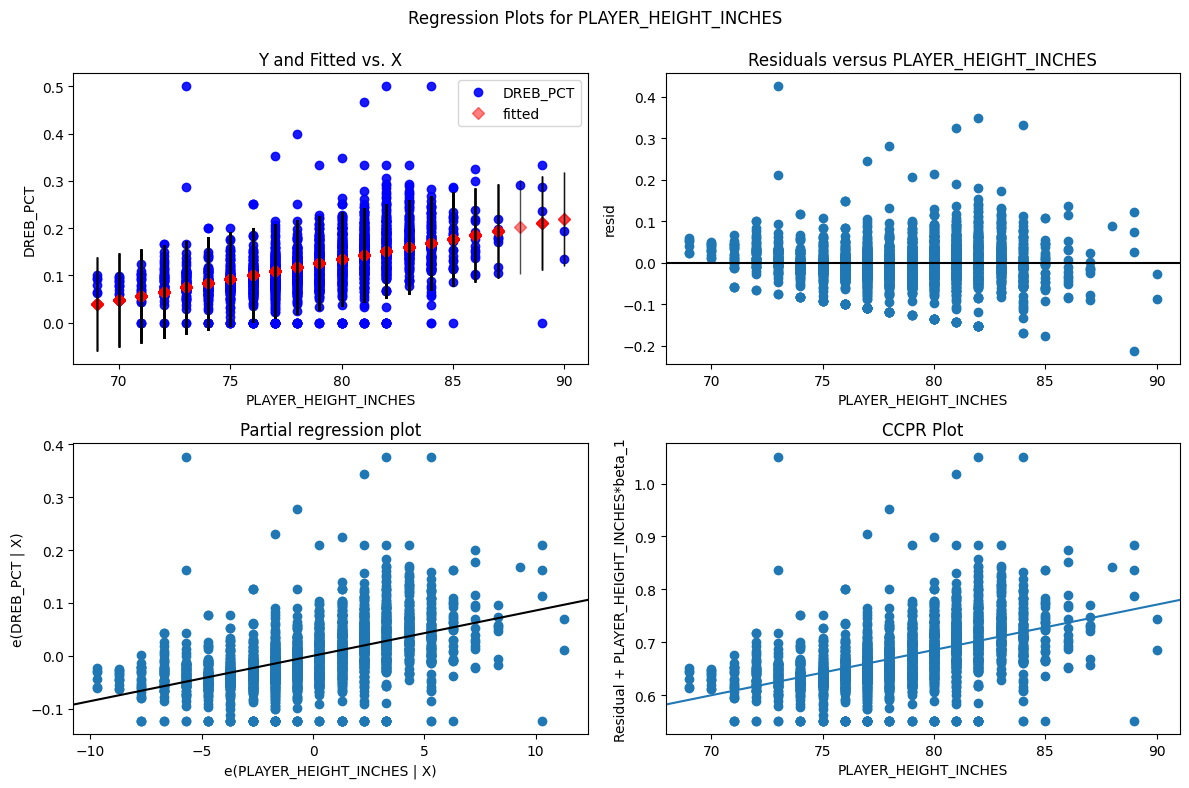

In [123]:
#ANOVA for height and DREB_PCT

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('DREB_PCT ~ PLAYER_HEIGHT_INCHES', data=players).fit()
#Visualize OLS
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PLAYER_HEIGHT_INCHES', fig=fig)

In [108]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
PLAYER_HEIGHT_INCHES,1.864550,1.0,730.123596,6.707595e-138
Residual,5.260717,2060.0,NaN,NaN


In [96]:
career_f.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [116]:
##Get a new dataframe of each height from the players dataframe

height_19 = players[players['PLAYER_HEIGHT_INCHES'] == 69]
height_20 = players[players['PLAYER_HEIGHT_INCHES'] == 70]
height_21 = players[players['PLAYER_HEIGHT_INCHES'] == 71]
height_22 = players[players['PLAYER_HEIGHT_INCHES'] == 72]
height_23 = players[players['PLAYER_HEIGHT_INCHES'] == 73]
height_24 = players[players['PLAYER_HEIGHT_INCHES'] == 74]
height_25 = players[players['PLAYER_HEIGHT_INCHES'] == 75]
height_26 = players[players['PLAYER_HEIGHT_INCHES'] == 76]
height_27 = players[players['PLAYER_HEIGHT_INCHES'] == 77]
height_28 = players[players['PLAYER_HEIGHT_INCHES'] == 78]
height_29 = players[players['PLAYER_HEIGHT_INCHES'] == 79]
height_30 = players[players['PLAYER_HEIGHT_INCHES'] == 80]
height_31 = players[players['PLAYER_HEIGHT_INCHES'] == 81]
height_32 = players[players['PLAYER_HEIGHT_INCHES'] == 82]
height_33 = players[players['PLAYER_HEIGHT_INCHES'] == 83]
height_34 = players[players['PLAYER_HEIGHT_INCHES'] == 84]
height_35 = players[players['PLAYER_HEIGHT_INCHES'] == 85]
height_36 = players[players['PLAYER_HEIGHT_INCHES'] == 86]
height_37 = players[players['PLAYER_HEIGHT_INCHES'] == 87]
height_38 = players[players['PLAYER_HEIGHT_INCHES'] == 88]
height_39 = players[players['PLAYER_HEIGHT_INCHES'] == 89]
height_40 = players[players['PLAYER_HEIGHT_INCHES'] == 90]

#Bootstrap each height
height_19_boot = height_19.sample(n=10000, replace=True)
height_20_boot = height_20.sample(n=10000, replace=True)
height_21_boot = height_21.sample(n=10000, replace=True)
height_22_boot = height_22.sample(n=10000, replace=True)
height_23_boot = height_23.sample(n=10000, replace=True)
height_24_boot = height_24.sample(n=10000, replace=True)
height_25_boot = height_25.sample(n=10000, replace=True)
height_26_boot = height_26.sample(n=10000, replace=True)
height_27_boot = height_27.sample(n=10000, replace=True)
height_28_boot = height_28.sample(n=10000, replace=True)
height_29_boot = height_29.sample(n=10000, replace=True)
height_30_boot = height_30.sample(n=10000, replace=True)
height_31_boot = height_31.sample(n=10000, replace=True)
height_32_boot = height_32.sample(n=10000, replace=True)
height_33_boot = height_33.sample(n=10000, replace=True)
height_34_boot = height_34.sample(n=10000, replace=True)
height_35_boot = height_35.sample(n=10000, replace=True)
height_36_boot = height_36.sample(n=10000, replace=True)
height_37_boot = height_37.sample(n=10000, replace=True)
height_38_boot = height_38.sample(n=10000, replace=True)
height_39_boot = height_39.sample(n=10000, replace=True)
height_40_boot = height_40.sample(n=10000, replace=True)

#Combine all the bootstrapped heights into one dataframe
heights_boot = pd.concat([height_19_boot, height_20_boot, height_21_boot, height_22_boot, height_23_boot, height_24_boot, height_25_boot, height_26_boot, height_27_boot, height_28_boot, height_29_boot, height_30_boot, height_31_boot, height_32_boot, height_33_boot, height_34_boot, height_35_boot, height_36_boot, height_37_boot, height_38_boot, height_39_boot, height_40_boot], axis=0)
heights_boot

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON_ID
1655,1629598,Chris Clemons,1610612745,HOU,22.0,5-9,69.0,180.0,Campbell,USA,...,161,30,27,-8.8,0.012,0.080,0.235,0.548,0.162,2019-20
50,202738,Isaiah Thomas,1610612758,SAC,25.0,5-9,69.0,185.0,Washington,USA,...,1465,210,454,0.7,0.019,0.065,0.254,0.574,0.317,2013-14
1895,2657,Yuta Tabuse,1610612756,PHX,24.0,5-9,69.0,165.0,Brigham Young-Hawaii,USA,...,7,4,3,-6.9,0.087,0.100,0.176,0.451,0.250,2004-05
942,101126,Nate Robinson,1610612743,DEN,30.0,5-9,69.0,180.0,Washington,USA,...,457,81,112,4.5,0.025,0.063,0.236,0.544,0.226,2013-14
1895,2657,Yuta Tabuse,1610612756,PHX,24.0,5-9,69.0,165.0,Brigham Young-Hawaii,USA,...,7,4,3,-6.9,0.087,0.100,0.176,0.451,0.250,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04


c:\Users\hanic\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


,sum_sq,df,F,PR(>F)
PLAYER_HEIGHT_INCHES,486.024600,1.0,146938.802503,0.0
Residual,727.680083,219998.0,NaN,NaN


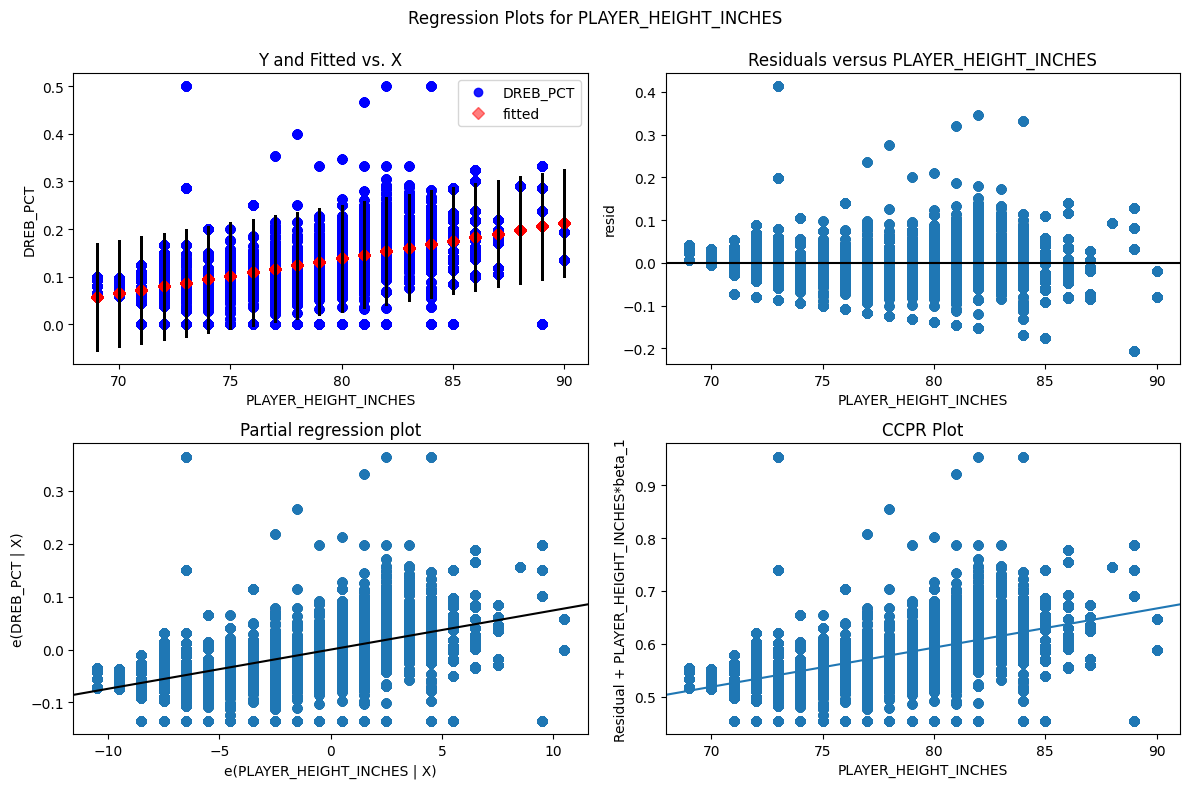

In [117]:
#ANOVA for height on bootstrapped DREB_PCT
model = ols('DREB_PCT ~ PLAYER_HEIGHT_INCHES', data=heights_boot).fit()
#Visualize OLS
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PLAYER_HEIGHT_INCHES', fig=fig)

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


In [190]:
#Get a new dataframe of each age from the players dataframe
age_19 = players[players['AGE']==19]
age_20 = players[players['AGE']==20]
age_21 = players[players['AGE']==21]
age_22 = players[players['AGE']==22]
age_23 = players[players['AGE']==23]
age_24 = players[players['AGE']==24]
age_25 = players[players['AGE']==25]
age_26 = players[players['AGE']==26]
age_27 = players[players['AGE']==27]
age_28 = players[players['AGE']==28]
age_29 = players[players['AGE']==29]
age_30 = players[players['AGE']==30]
age_31 = players[players['AGE']==31]
age_32 = players[players['AGE']==32]
age_33 = players[players['AGE']==33]
age_34 = players[players['AGE']==34]
age_35 = players[players['AGE']==35]
age_36 = players[players['AGE']==36]
age_37 = players[players['AGE']==37]
age_38 = players[players['AGE']==38]

#Bootstrap each age
age_19_boot = age_19.sample(n=10000, replace=True)
age_20_boot = age_20.sample(n=10000, replace=True)
age_21_boot = age_21.sample(n=10000, replace=True)
age_22_boot = age_22.sample(n=10000, replace=True)
age_23_boot = age_23.sample(n=10000, replace=True)
age_24_boot = age_24.sample(n=10000, replace=True)
age_25_boot = age_25.sample(n=10000, replace=True)
age_26_boot = age_26.sample(n=10000, replace=True)
age_27_boot = age_27.sample(n=10000, replace=True)
age_28_boot = age_28.sample(n=10000, replace=True)
age_29_boot = age_29.sample(n=10000, replace=True)
age_30_boot = age_30.sample(n=10000, replace=True)
age_31_boot = age_31.sample(n=10000, replace=True)
age_32_boot = age_32.sample(n=10000, replace=True)
age_33_boot = age_33.sample(n=10000, replace=True)
age_34_boot = age_34.sample(n=10000, replace=True)
age_35_boot = age_35.sample(n=10000, replace=True)
age_36_boot = age_36.sample(n=10000, replace=True)
age_37_boot = age_37.sample(n=10000, replace=True)
age_38_boot = age_38.sample(n=10000, replace=True)

#Combine all the bootstrapped dataframes
age_boot = pd.concat([age_19_boot, age_20_boot, age_21_boot, age_22_boot, age_23_boot, age_24_boot, age_25_boot, age_26_boot, age_27_boot, age_28_boot, age_29_boot, age_30_boot, age_31_boot, age_32_boot, age_33_boot, age_34_boot, age_35_boot, age_36_boot, age_37_boot, age_38_boot])


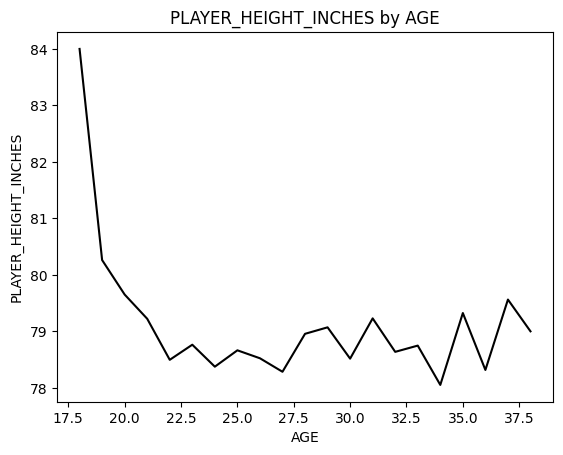

In [200]:
plot_A_by_B(data=players_boot, A='PLAYER_HEIGHT_INCHES', B='AGE')

In [204]:
# t test for height and DREB_PCT

from scipy.stats import ttest_ind

ttest_ind(players_boot[players_boot["AGE"]==22]['PLAYER_HEIGHT_INCHES'], players_boot[players_boot["AGE"]==25]['PLAYER_HEIGHT_INCHES'])



TtestResult(statistic=-1.024676508161455, pvalue=0.30564852345303983, df=1868.0)

c:\Users\hanic\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DREB_PCT   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     730.1
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          6.71e-138
Time:                        21:44:43   Log-Likelihood:                 3230.4
No. Observations:                2062   AIC:                            -6457.
Df Residuals:                    2060   BIC:                            -6446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5511      0.025    -22.059      0.000      -0.600      -0.502
PLAYER_HEIGHT_INCHES     0.0086      0.000     27.021      0.000       0.008       0.009
==============================================================================
Omnibus:                      473.288   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4103.285
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       9.709   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

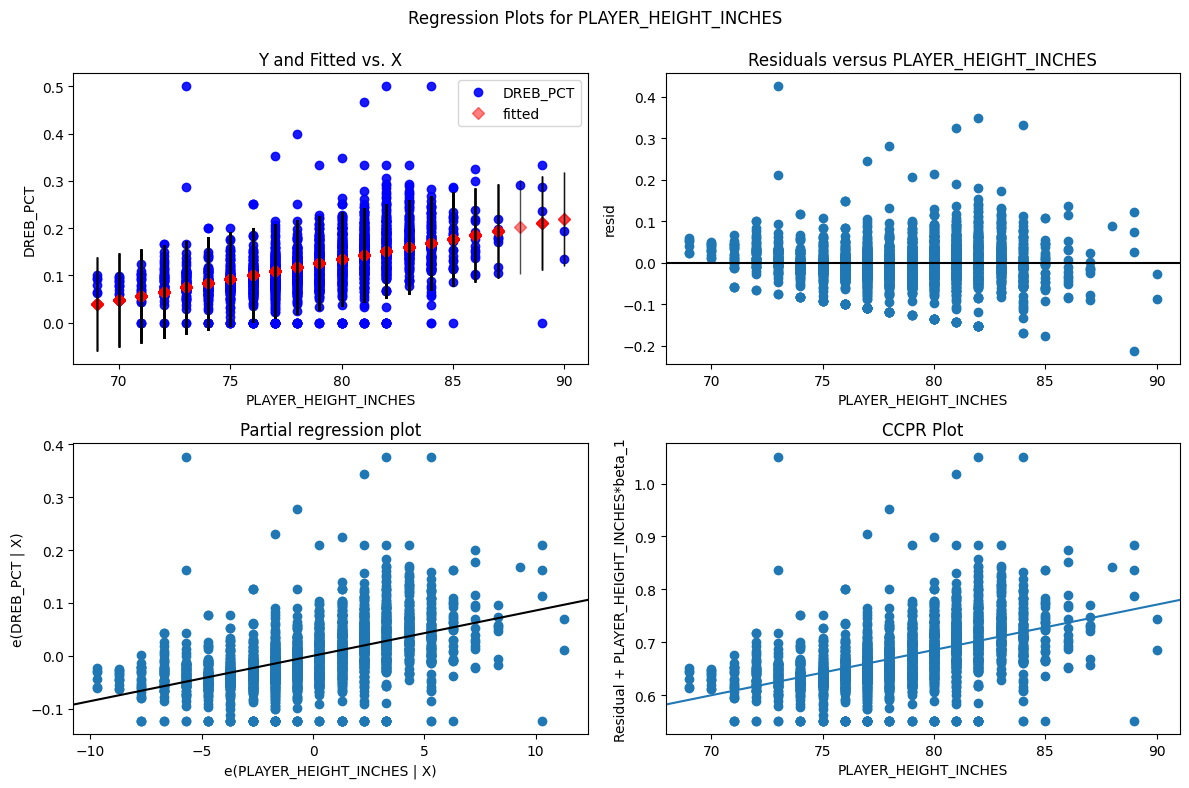

In [120]:
#Run a regression on original data
model = ols('DREB_PCT ~ PLAYER_HEIGHT_INCHES', data=players).fit()
#Visualize OLS
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PLAYER_HEIGHT_INCHES', fig=fig)
#ols summary
model.summary()



In [303]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DREB_PCT   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     730.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          6.71e-138
Time:                        09:19:41   Log-Likelihood:                 3230.4
No. Observations:                2062   AIC:                            -6457.
Df Residuals:                    2060   BIC:                            -6446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5511      0.025    -22.059      0.000      -0.600      -0.502
PLAYER_HEIGHT_INCHES     0.0086      0.000     27.021      0.000       0.008       0.009
==============================================================================
Omnibus:                      473.288   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4103.285
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       9.709   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pearsons correlation: 0.512


Text(0, 0.5, 'DREB_PCT')

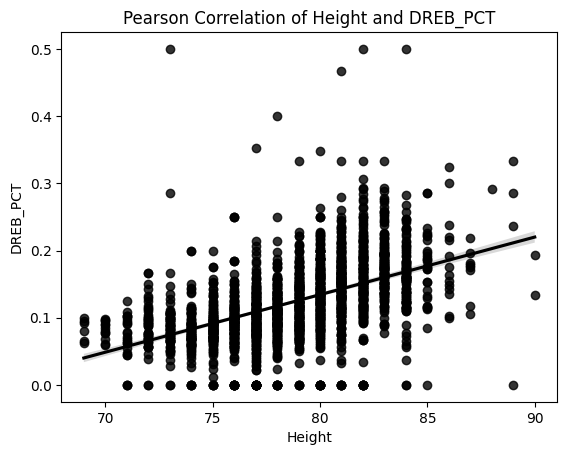

In [122]:
#Pearson Correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(players['PLAYER_HEIGHT_INCHES'], players['DREB_PCT'])
print('Pearsons correlation: %.3f' % corr)
#Visualize Pearson Correlation
sns.regplot(x=players['PLAYER_HEIGHT_INCHES'], y=players['DREB_PCT'], color='black')
plt.title('Pearson Correlation of Height and DREB_PCT')
plt.xlabel('Height')
plt.ylabel('DREB_PCT')




In [130]:
#Analyze height categorically: use Fisher's Test

heights_cat = heights_boot.copy()
heights_cat['PLAYER_HEIGHT_INCHES'] = heights_cat['PLAYER_HEIGHT_INCHES'].astype('category')
#Fisher's Test

# Binarize 'DREB_PCT' and 'PLAYER_HEIGHT_INCHES'
heights_cat['DREB_PCT_BIN'] = pd.cut(heights_cat['DREB_PCT'], bins=2, labels=[0, 1])
heights_cat['PLAYER_HEIGHT_BIN'] = pd.cut(heights_cat['PLAYER_HEIGHT_INCHES'], bins=2, labels=[0, 1])
from scipy.stats import fisher_exact
# Perform Fisher's exact test on the 2x2 contingency table
oddsratio, pvalue = fisher_exact(pd.crosstab(heights_cat['DREB_PCT_BIN'], heights_cat['PLAYER_HEIGHT_BIN']))
print('Odds Ratio: %.3f' % oddsratio)
pvalue

Odds Ratio: 51.643


0.0

In [141]:
heights_boot

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT,SEASON_ID
1655,1629598,Chris Clemons,1610612745,HOU,22.0,5-9,69.0,180.0,Campbell,USA,...,161,30,27,-8.8,0.012,0.080,0.235,0.548,0.162,2019-20
50,202738,Isaiah Thomas,1610612758,SAC,25.0,5-9,69.0,185.0,Washington,USA,...,1465,210,454,0.7,0.019,0.065,0.254,0.574,0.317,2013-14
1895,2657,Yuta Tabuse,1610612756,PHX,24.0,5-9,69.0,165.0,Brigham Young-Hawaii,USA,...,7,4,3,-6.9,0.087,0.100,0.176,0.451,0.250,2004-05
942,101126,Nate Robinson,1610612743,DEN,30.0,5-9,69.0,180.0,Washington,USA,...,457,81,112,4.5,0.025,0.063,0.236,0.544,0.226,2013-14
1895,2657,Yuta Tabuse,1610612756,PHX,24.0,5-9,69.0,165.0,Brigham Young-Hawaii,USA,...,7,4,3,-6.9,0.087,0.100,0.176,0.451,0.250,2004-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04
728,762,Shawn Bradley,1610612742,DAL,32.0,7-6,90.0,275.0,Brigham Young,USA,...,219,173,20,3.5,0.091,0.134,0.130,0.523,0.038,2003-04


In [144]:
#Chi-Squared Test of Independence

from scipy.stats import chi2_contingency
# Perform Chi-Squared test on the 2x2 contingency table
chi2, p, dof, expected = chi2_contingency(pd.crosstab(heights_boot['DREB_PCT'], heights_boot['PLAYER_HEIGHT_INCHES']))
print('Chi-Squared: %.3f' % chi2)
p, dof, expected



Chi-Squared: 1568326.988


(0.0,
 5187,
 array([[397.45454545, 397.45454545, 397.45454545, ..., 397.45454545,
         397.45454545, 397.45454545],
        [  3.36363636,   3.36363636,   3.36363636, ...,   3.36363636,
           3.36363636,   3.36363636],
        [  4.04545455,   4.04545455,   4.04545455, ...,   4.04545455,
           4.04545455,   4.04545455],
        ...,
        [  2.31818182,   2.31818182,   2.31818182, ...,   2.31818182,
           2.31818182,   2.31818182],
        [  2.27272727,   2.27272727,   2.27272727, ...,   2.27272727,
           2.27272727,   2.27272727],
        [ 11.77272727,  11.77272727,  11.77272727, ...,  11.77272727,
          11.77272727,  11.77272727]]))

## Longitudinal analysis of players

### Do players play better as they age?


In [256]:
import matplotlib.pyplot as plt
import numpy as np

def stat_difference_by_years(df, stat='DREB_PCT'):
    players = df['PLAYER_ID'].unique()
    differences = {i: [] for i in range(1, df['AGE'].max())}

    for player in players:
        player_data = df[df['PLAYER_ID'] == player]
        player_data = player_data.sort_values(by=['AGE']).reset_index(drop=True)
        initial_stat = player_data.loc[0, stat]

        for i in range(1, len(player_data)):
            diff = player_data.loc[i, stat] - initial_stat
            differences[i].append(diff)
            initial_stat = player_data.loc[i, stat]

    avg_differences = {k: np.mean(v) for k, v in differences.items() if v}

    # Plot the average differences
    plt.plot(list(avg_differences.keys()), list(avg_differences.values()))
    plt.title(stat + ' Average Difference Over Years')
    plt.xlabel('Years Since First Record')
    plt.ylabel('Average ' + stat + ' Difference')
    plt.show()

Text(0.5, 1.0, 'PF_PM by Age')

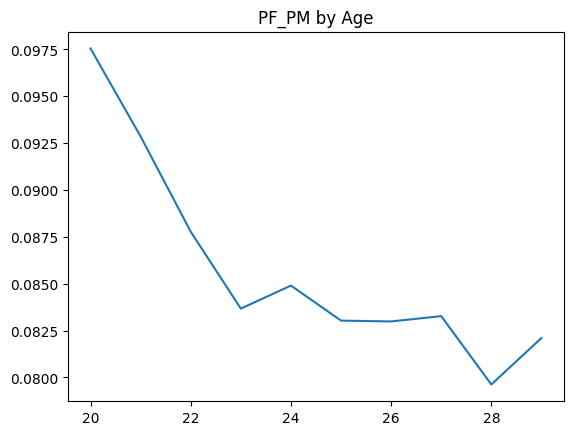

In [264]:
data2c = data2.copy()
t1 = data2c[data2c['AGE'] == 20]['PF_PM'].mean()
t2 = data2c[data2c['AGE'] == 21]['PF_PM'].mean()
t3 = data2c[data2c['AGE'] == 22]['PF_PM'].mean()
t4 = data2c[data2c['AGE'] == 23]['PF_PM'].mean()
t5 = data2c[data2c['AGE'] == 24]['PF_PM'].mean()
t6 = data2c[data2c['AGE'] == 25]['PF_PM'].mean()
t7 = data2c[data2c['AGE'] == 26]['PF_PM'].mean()
t8 = data2c[data2c['AGE'] == 27]['PF_PM'].mean()
t9 = data2c[data2c['AGE'] == 28]['PF_PM'].mean()
t10 = data2c[data2c['AGE'] == 29]['PF_PM'].mean()

sns.lineplot(x=[20, 21, 22, 23, 24, 25, 26, 27, 28, 29], y=[t1, t2, t3, t4, t5, t6, t7, t8, t9, t10])
plt.title('PF_PM by Age')

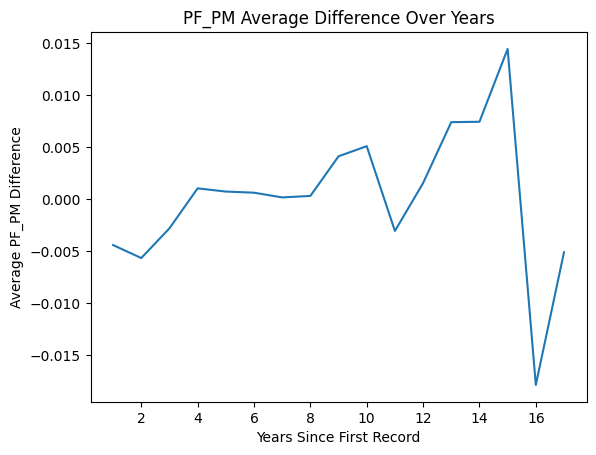

In [263]:
stat_difference_by_years(data2c, stat='PF_PM')


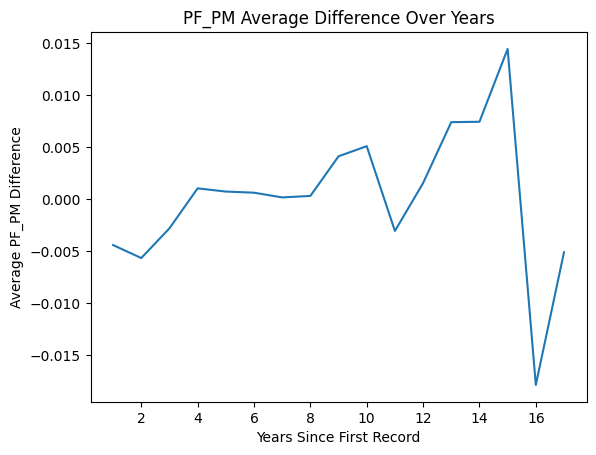

In [257]:
stat_difference_by_years(data2, 'PF_PM')

Do players commit more or less fouls as they age?

In [207]:
#Data: players who started at age 20
X20 = data2[data2['AGE']==20][['PF_PM']]
X21 = data2[data2['AGE']==21][['PF_PM']]
X22 = data2[data2['AGE']==22][['PF_PM']]
X23 = data2[data2['AGE']==23][['PF_PM']]
X24 = data2[data2['AGE']==24][['PF_PM']]
X25 = data2[data2['AGE']==25][['PF_PM']]
X26 = data2[data2['AGE']==26][['PF_PM']]
X27 = data2[data2['AGE']==27][['PF_PM']]
X28 = data2[data2['AGE']==28][['PF_PM']]
X29 = data2[data2['AGE']==29][['PF_PM']]
X30 = data2[data2['AGE']==30][['PF_PM']]

means_vector = [X20.mean(), X21.mean(), X22.mean(), X23.mean(), X24.mean(), X25.mean(), X26.mean(), X27.mean(), X28.mean(), X29.mean(), X30.mean()]
std_err_vector = [X20.std()/np.sqrt(len(X20)), X21.std()/np.sqrt(len(X21)), X22.std()/np.sqrt(len(X22)), X23.std()/np.sqrt(len(X23)), X24.std()/np.sqrt(len(X24)), X25.std()/np.sqrt(len(X25)), X26.std()/np.sqrt(len(X26)), X27.std()/np.sqrt(len(X27)), X28.std()/np.sqrt(len(X28)), X29.std()/np.sqrt(len(X29)), X30.std()/np.sqrt(len(X30))]
ages = list(range(20,31))

Text(0.5, 0.98, 'Personal Fouls per minute by age, for players who started their career at age 20')

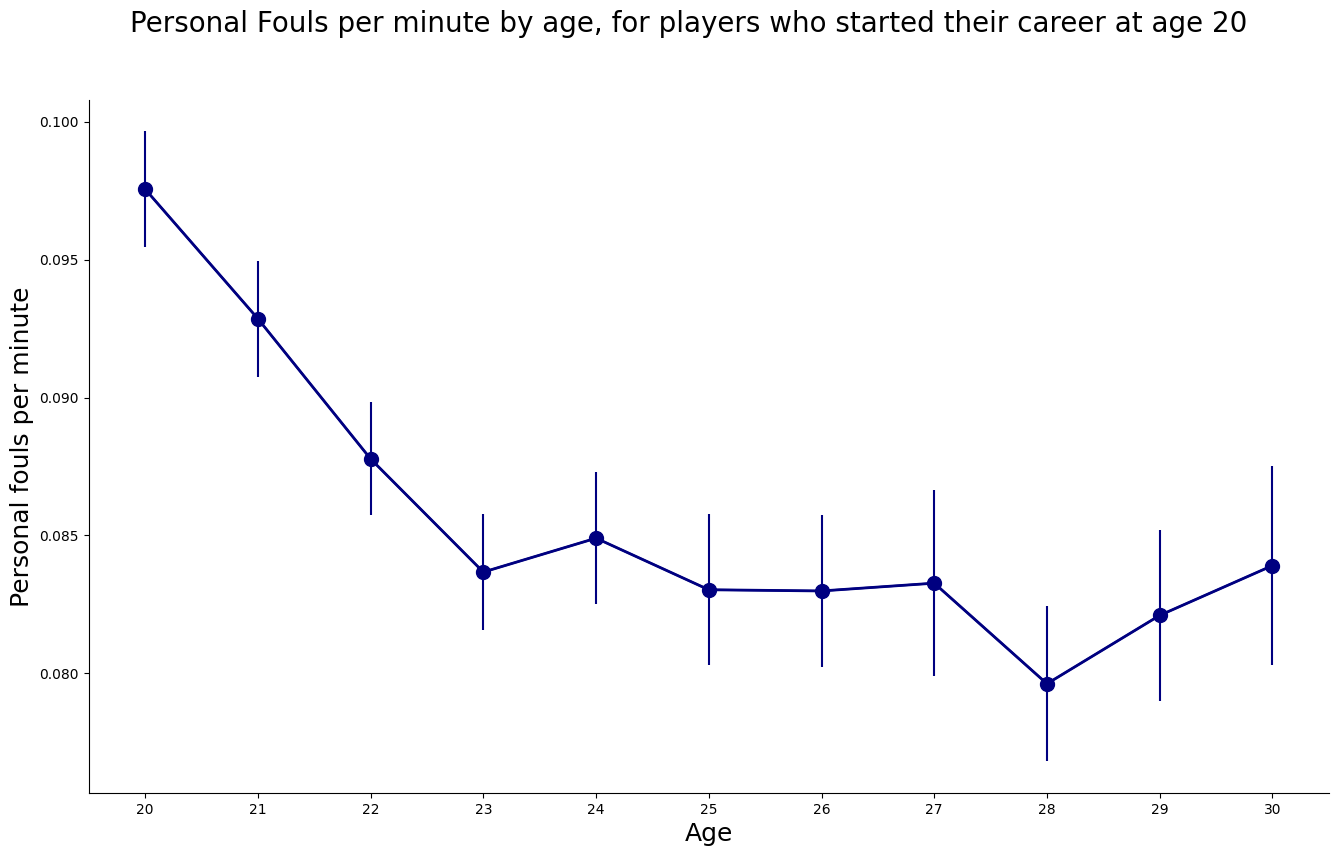

In [230]:
#Turn standard error vector into 1D
means_vector = np.array(means_vector).reshape(-1)
std_err_vector = np.array(std_err_vector).reshape(-1)


# Define panel
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

# Plot means vector against year
ax.plot(ages, means_vector,
        ls="-",              # adjust linestyle
        lw=2.0,              # adjust linewidth
        marker="o",          # add marker                    
        markersize=10,       # adjust marker size
        color="navy",        # adjust color
        label="Mean")

# Plot the means vector against year, with standard error as error bar
ax.errorbar(ages, means_vector, yerr=std_err_vector,
            color="navy",
            label="Standard error")
        
# Ensure to display years as integers
ax.set_xticks([year for year in ages])
    
# Add label for x- and y-axis
ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Personal fouls per minute', fontsize=18)

    
# Remove top and right spines of the plot (aesthetics)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
fig.suptitle('Personal Fouls per minute by age, for players who started their career at age 20', fontsize=20)

In [225]:
X_list = [X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
#Empty dataframe
X = pd.DataFrame()
j=20
for i in X_list:
    X = pd.concat([X, i['PF_PM'].reset_index(drop=True)], axis=1)
    X.rename(columns={'PF_PM': str(j)}, inplace=True)
    j+=1
X

,20,21,22,23,24,25,26,27,28,29,30
0,0.118839,0.082739,0.103465,0.072727,0.097817,0.080062,0.039361,0.062774,0.089916,0.137809,0.076640
1,0.100149,0.065470,0.048387,0.070520,0.093366,0.075423,0.096305,0.097238,0.078547,0.073011,0.078740
2,0.060991,0.084677,0.095584,0.071429,0.106908,0.070637,0.086649,0.060764,0.097332,0.086496,0.130435
3,0.077586,0.085000,0.094059,0.060482,0.124498,0.087770,0.100968,0.114691,0.132998,0.069088,0.063957
4,0.112150,0.058017,0.112536,0.140044,0.084382,0.068919,0.048289,0.115987,0.057442,0.081757,0.100218
...,...,...,...,...,...,...,...,...,...,...,...
228,0.167677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,0.071596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,0.089189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,0.074074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
TS, p = stats.ttest_rel(X20, X20)
# Compute Cohen's d
cohens_d = (X20.mean() - X20.mean()) / (np.sqrt((X20.std() ** 2 + X20.std() ** 2) / 2))
cohens_d

PF_PM    0.0
dtype: float64

In [232]:
for i in range(21, 31):
    X_sub = X[['20', str(i)]].dropna()
    TS, p = stats.ttest_rel(X_sub['20'], X_sub[str(i)])
    # Print results
    print("Ages", 20, "and", i)
    print(f"TS: {TS:.3f}", f"p-value: {p:.5}", sep="\n")
    # Compute Cohen's d
    cohens_d = (X_sub['20'].mean() - X_sub[str(i)].mean()) / (np.sqrt((X_sub['20'].std() ** 2 + X_sub[str(i)].std() ** 2) / 2))
    print(f"Cohen's d: {cohens_d:.3f}", "\n")


Ages 20 and 21
TS: 0.993
p-value: 0.32192
Cohen's d: 0.104 

Ages 20 and 22
TS: 1.981
p-value: 0.04924
Cohen's d: 0.231 

Ages 20 and 23
TS: 3.230
p-value: 0.0015292
Cohen's d: 0.372 

Ages 20 and 24
TS: 2.089
p-value: 0.038754
Cohen's d: 0.268 

Ages 20 and 25
TS: 2.288
p-value: 0.024115
Cohen's d: 0.335 

Ages 20 and 26
TS: 2.170
p-value: 0.032553
Cohen's d: 0.334 

Ages 20 and 27
TS: 1.751
p-value: 0.08355
Cohen's d: 0.266 

Ages 20 and 28
TS: 2.880
p-value: 0.0052758
Cohen's d: 0.475 

Ages 20 and 29
TS: 2.618
p-value: 0.011223
Cohen's d: 0.410 

Ages 20 and 30
TS: 1.479
p-value: 0.14513
Cohen's d: 0.298 



In [251]:
p_vals = pd.DataFrame(index=[str(x) for x in list(range(20, 31))], columns=["20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"])
for i in range(20, 31):
    for j in range(20, 31):
        X_sub = X[[str(i), str(j)]].dropna()
        TS, p = stats.ttest_rel(X_sub[str(i)], X_sub[str(j)])
        p_vals.loc[str(i), str(j)] = p
for i in range(20, 31):
    p_vals.loc[str(i), str(i)] = 1
p_vals



,20,21,22,23,24,25,26,27,28,29,30
20,1,0.321915,0.04924,0.001529,0.038754,0.024115,0.032553,0.08355,0.005276,0.011223,0.145135
21,0.321915,1,0.16005,0.023369,0.035915,0.025623,0.028331,0.044073,0.003086,0.107442,0.259096
22,0.04924,0.16005,1,0.292078,0.913334,0.575555,0.602192,0.693363,0.148578,0.278359,0.514012
23,0.001529,0.023369,0.292078,1,0.430877,0.256616,0.305728,0.402569,0.781939,0.70577,0.394364
24,0.038754,0.035915,0.913334,0.430877,1,0.821093,0.751374,0.74351,0.566721,0.755378,0.882032
25,0.024115,0.025623,0.575555,0.256616,0.821093,1,0.752655,0.650389,0.903037,0.51186,0.359764
26,0.032553,0.028331,0.602192,0.305728,0.751374,0.752655,1,0.653079,0.778146,0.432683,0.224992
27,0.08355,0.044073,0.693363,0.402569,0.74351,0.650389,0.653079,1,0.365,0.833734,0.725696
28,0.005276,0.003086,0.148578,0.781939,0.566721,0.903037,0.778146,0.365,1,0.494852,0.356656
29,0.011223,0.107442,0.278359,0.70577,0.755378,0.51186,0.432683,0.833734,0.494852,1,0.586851


In [243]:
cohens_vals = pd.DataFrame(index=[str(x) for x in list(range(20, 31))], columns=["20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"])
for i in range(20,31):
    for j in range(20,31):
        X_sub = X[[str(i), str(j)]].dropna()
        cohens_d = (X_sub[str(i)].mean() - X_sub[str(j)].mean()) / (np.sqrt((X_sub[str(i)].std() ** 2 + X_sub[str(j)].std() ** 2) / 2))
        cohens_vals[str(i)][str(j)] = cohens_d
for i in range(20,31):
    cohens_vals[str(i)][str(i)] = 0
cohens_vals

,20,21,22,23,24,25,26,27,28,29,30
20,0,-0.104159,-0.23107,-0.371965,-0.267662,-0.334595,-0.334165,-0.2656,-0.474694,-0.410433,-0.297563
21,0.104159,0,-0.157178,-0.271499,-0.254574,-0.306375,-0.32159,-0.289908,-0.492152,-0.297423,-0.222458
22,0.23107,0.157178,0,-0.121011,-0.014424,-0.071223,-0.076326,-0.061149,-0.250645,-0.209383,-0.124255
23,0.371965,0.271499,0.121011,0,0.097458,0.142519,0.149534,0.124368,-0.047459,0.071185,0.146829
24,0.267662,0.254574,0.014424,-0.097458,0,-0.030573,-0.043804,0.052305,-0.089018,-0.056768,0.027773
25,0.334595,0.306375,0.071223,-0.142519,0.030573,0,0.042211,0.066763,0.018918,0.131474,0.187004
26,0.334165,0.32159,0.076326,-0.149534,0.043804,-0.042211,0,0.064251,-0.04664,0.160133,0.245314
27,0.2656,0.289908,0.061149,-0.124368,-0.052305,-0.066763,-0.064251,0,-0.148832,-0.039092,0.071699
28,0.474694,0.492152,0.250645,0.047459,0.089018,-0.018918,0.04664,0.148832,0,0.122762,0.187214
29,0.410433,0.297423,0.209383,-0.071185,0.056768,-0.131474,-0.160133,0.039092,-0.122762,0,0.110203


Text(0.5, 1.0, "Cohen's d for Fouls/min by age for ages 20-30")

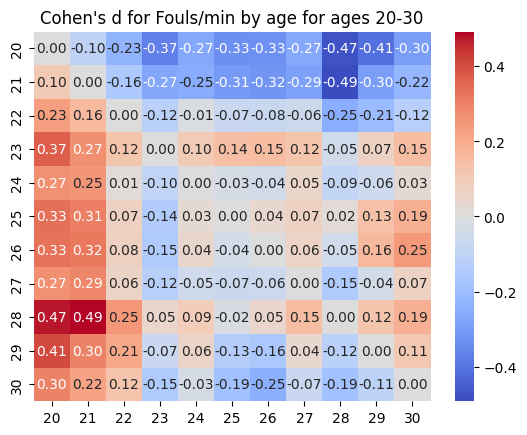

In [249]:
sns.heatmap(cohens_vals.astype(float),cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Cohen's d for Fouls/min by age for ages 20-30")

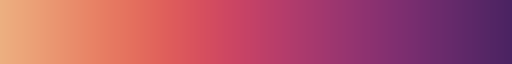

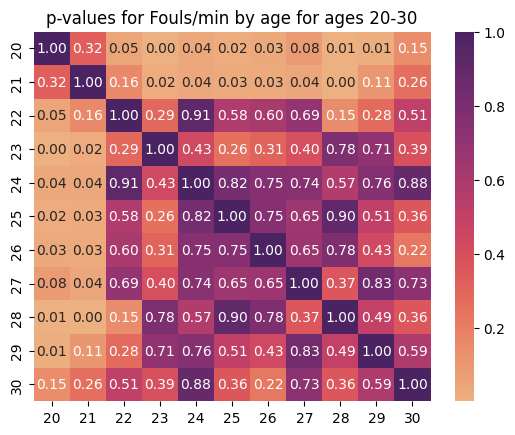

In [254]:
sns.heatmap(p_vals.astype(float),cmap=sns.cm.flare, annot=True, fmt=".2f")
plt.title("p-values for Fouls/min by age for ages 20-30")
sns.cm.flare

C:\Users\hanic\AppData\Local\Temp\ipykernel_24068\3945268248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'] = df['AGE'].astype(int)


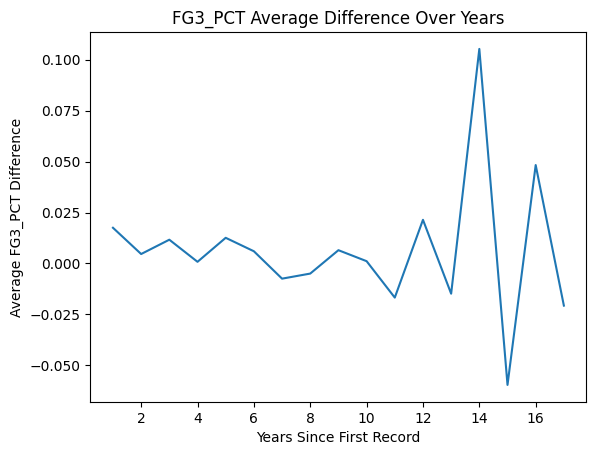

In [173]:
stat_difference_by_years(data2, 'FG3_PCT')

In [154]:
years_with_vals_2D=np.array(data[['AGE', 'PLAYER_ID', 'DREB_PCT']])
(np.zeros((len(years_with_vals_2D), 1))).shape

(8322, 1)

In [165]:
data[data['PLAYER_ID'] == 203932]

,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
2,203932,2022-23,27.0,80.0,235.0,0.086,0.136,0.617,2055.0,0.370316,0.564000,0.084185,0.347000,0.092944,0.024818,0.062774
447,203932,2021-22,26.0,80.0,235.0,0.057,0.129,0.602,2375.0,0.351158,0.520000,0.109474,0.335000,0.072000,0.018526,0.062316
924,203932,2020-21,25.0,80.0,235.0,0.055,0.150,0.547,2768.0,0.360549,0.466667,0.127168,0.325333,0.070087,0.024566,0.064306
1379,203932,2018-19,23.0,81.0,220.0,0.047,0.165,0.538,2633.0,0.397265,0.449000,0.131789,0.349000,0.070262,0.021269,0.065325
1818,203932,2017-18,22.0,81.0,220.0,0.044,0.191,0.530,1909.0,0.453117,0.434000,0.179151,0.336000,0.082242,0.023573,0.058146
2256,203932,2016-17,21.0,81.0,220.0,0.048,0.124,0.530,2298.0,0.376414,0.454000,0.116188,0.288000,0.067885,0.017406,0.074848
2669,203932,2015-16,20.0,81.0,220.0,0.080,0.189,0.541,1863.0,0.310789,0.473000,0.076221,0.296000,0.069243,0.029522,0.082126
7894,203932,2019-20,24.0,80.0,235.0,0.050,0.181,0.516,2017.0,0.380268,0.437000,0.117501,0.308000,0.074864,0.019336,0.061973


### Traps

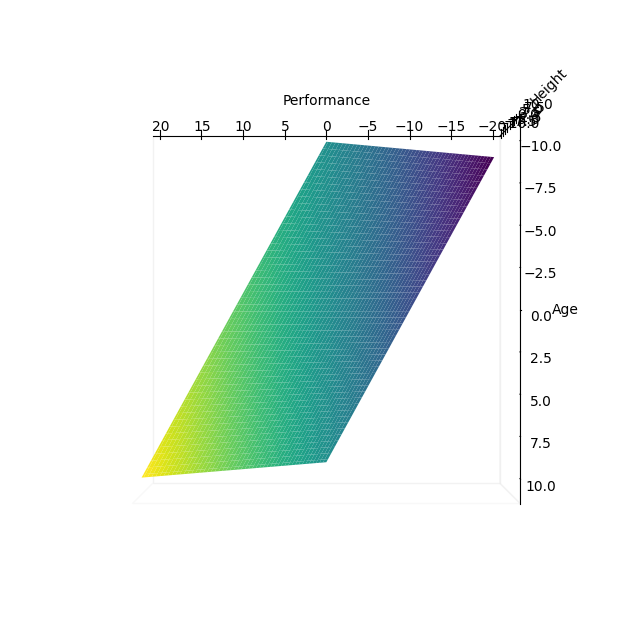

In [299]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a meshgrid of age and height values
age = np.linspace(-10, 10, 100)
height = np.linspace(-10, 10, 100)
age, height = np.meshgrid(age, height)

# Define the function performance = age + height
performance = age + height

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(age, height, performance, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Performance')

# Hide the grid lines
ax.grid(False)

# Hide the side borders
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Equal scaling for all axes
ax.set_box_aspect([1, 1, 1])

# Adjust viewing angle and zoom level
ax.view_init(0,90,90)
ax.dist = 20

# Show the plot
plt.show()


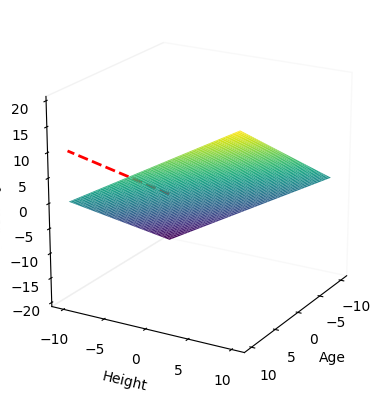

In [300]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a meshgrid of age and height values
age = np.linspace(-10, 10, 100)
height = np.linspace(-10, 10, 100)
age, height = np.meshgrid(age, height)

# Define the function performance = age + height
performance = age + height

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(age, height, performance, cmap='viridis', edgecolor='none')

# Plot the diagonal line
diagonal_line = ax.plot(age[0], height[0], age[0], color='red', linestyle='--', linewidth=2)

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Performance')

# Hide the grid lines
ax.grid(False)

# Hide the side borders
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Equal scaling for all axes
ax.set_box_aspect([1, 1, 1])

# Adjust viewing angle and zoom level
ax.view_init(elev=20, azim=30)
ax.dist = 12

# Show the plot
plt.show()


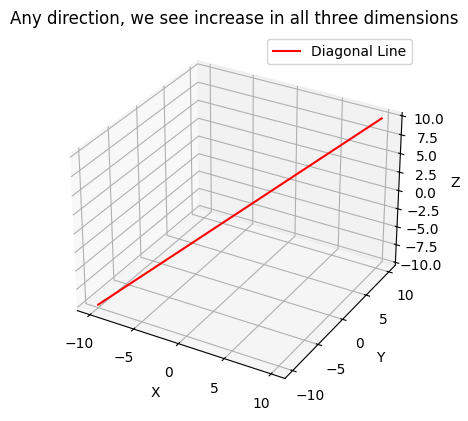

In [302]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate values for t
t_values = np.linspace(-10, 10, 100)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line (x, y, z) = (t, t, t)
ax.plot(t_values, t_values, t_values, color='red', label='Diagonal Line')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title
plt.title('Any direction, we see increase in all three dimensions')

# Add a legend
ax.legend()

# Show the plot
plt.show()



## Reference


Explanation of attributes: 

|Attribute|Meaning|Extra info|
|---|---|---|
|MIN|minutes   |   |
|FG, FG3, FT|Field goal (2 point goals), field goal 3 pointers, free throws ("penalty throws", 1 point)-  |M: Made (scored), A: attempted, PCT: percentage    |
| REB  |Rebounds   |OREB/DREB: Offensive/defensive rebound  |
|AST|Assists   |AST_PCT: Assist percentage   |
|STL|Steals   |   |
|BLK|Blocks   |   |
|TOV|Turnovers   | Negative statistic  |
|PF|Personal fouls   | Negative statistic  |
|PTS|Points   |   |
|---|--------------------------------------------------------------------| --------------------------------------------------------------------  |
|DRAFT|Each year before the season starts, 60(?) college newcomers can be drafted by teams   |More "promising" players are drafted in earlier rounds   |
|GP, GS|Games played, games started   |   |
|NET_RATING|Offensive rating - defensive rating   |For a player: measure for how many goals a team scores with him vs. allow in. Can be negative.   |
|USG_PCT|Usage percentage   | Estimate of percentage of team plays    |
|TS_PCT|True shooting percentage   | Measures how well a player shoots-  |


Text(0.5, 1.0, 'Minutes per game by age')

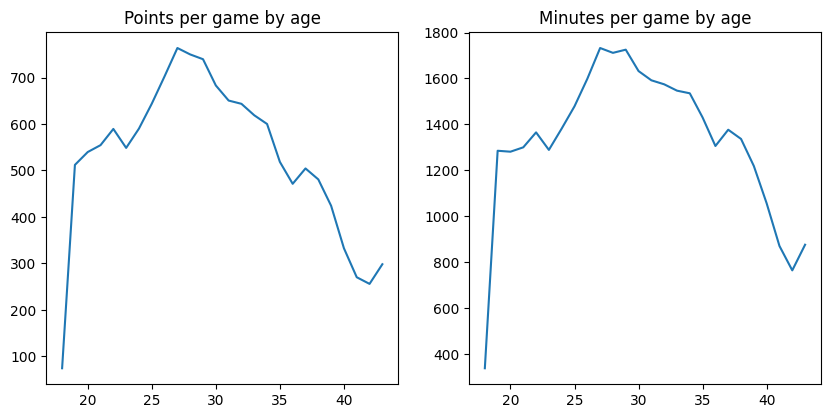

In [17]:
fig, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(10, 6))
sns.lineplot(x=ages, y=point_means, ax=ax[0])
sns.lineplot(x=ages, y=min_means, ax=ax[1])
ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')
ax[0].set_title('Points per game by age')
ax[1].set_title('Minutes per game by age')

There is an obvious correlation between minutes played and points scored. So we have to adjust by "per minute" score. <br>
But in the meantime we can check 'FG_PCT', 'FG3_PCT', and 'FT_PCT' as they are already normalized:

Text(0.5, 1.0, 'FT_PCT avg by age')

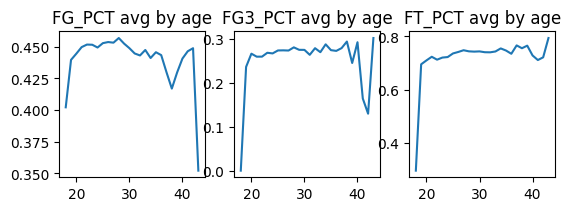

In [18]:
fig, ax = plt.subplots(nrows=1 ,ncols=3, )
sns.lineplot(x=ages, y=fg_pct_means, ax=ax[0])
sns.lineplot(x=ages, y=three_pct_means, ax=ax[1])
sns.lineplot(x=ages, y=ft_pct_means, ax=ax[2])
ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box')
ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')
ax[2].set_aspect(1.0/ax[2].get_data_ratio(), adjustable='box')
ax[0].set_title('FG_PCT avg by age')
ax[1].set_title('FG3_PCT avg by age')
ax[2].set_title('FT_PCT avg by age')

Aside from very young and very old players, the age seems to matter little but can matter, but for old players the statistics can change very much like a roller coaster. Probably it is better to filter too old players and too young players, but I can try both methods.

In [11]:
#Normalize by minutes

def normalize_by_min(df=career_f, cols=career_f.columns, mins=career_f['MIN']):
    for col in cols:
        df[col] = df[col]/mins
        df = df.rename(columns={col: col + '_PM'})
    return df

norm_cols = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'REB', 'AST', 'STL',
             'BLK', 'TOV', 'PF', 'PTS']
career_f = normalize_by_min(career_f, cols=norm_cols, mins=career_f['MIN'])
career_f

,PLAYER_ID,SEASON_ID,PLAYER_AGE,MIN,FGM_PM,FGA_PM,FG_PCT,FG3M_PM,FG3A_PM,FG3_PCT,FTM_PM,FTA_PM,FT_PCT,REB_PM,AST_PM,STL_PM,BLK_PM,TOV_PM,PF_PM,PTS_PM
0,15,2005-06,35.0,228.0,0.105263,0.267544,0.393,0.039474,0.144737,0.273,0.008772,0.02193,0.4,0.100877,0.057018,0.026316,0.004386,0.048246,0.087719,0.258772
1,15,2004-05,34.0,839.0,0.1323,0.307509,0.43,0.067938,0.159714,0.425,0.053635,0.066746,0.804,0.09416,0.060787,0.034565,0.001192,0.0441,0.079857,0.386174
2,15,2003-04,33.0,703.0,0.102418,0.271693,0.377,0.061166,0.173542,0.352,0.019915,0.02276,0.875,0.103841,0.036984,0.02276,0.007112,0.041252,0.059744,0.285917
3,43,2003-04,32.0,185.0,0.091892,0.243243,0.378,0.043243,0.097297,0.444,0.027027,0.027027,1.0,0.081081,0.075676,0.032432,0.010811,0.032432,0.032432,0.254054
4,56,2006-07,38.0,1503.0,0.095808,0.243513,0.393,0.021291,0.081836,0.26,0.025283,0.037924,0.667,0.087824,0.133733,0.028609,0.001996,0.043912,0.077844,0.23819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8465,1631230,2022-23,20.0,408.0,0.112745,0.210784,0.535,0.0,0.009804,0.0,0.044118,0.061275,0.72,0.25,0.058824,0.02451,0.046569,0.036765,0.137255,0.269608
8466,1631254,2022-23,20.0,176.0,0.278409,0.528409,0.527,0.034091,0.096591,0.353,0.090909,0.153409,0.593,0.289773,0.113636,0.028409,0.011364,0.068182,0.159091,0.681818
8467,1631260,2022-23,23.0,345.0,0.153623,0.362319,0.424,0.127536,0.304348,0.419,0.011594,0.011594,1.0,0.130435,0.063768,0.017391,0.0,0.026087,0.089855,0.446377
8468,1631288,2022-23,24.0,240.0,0.154167,0.275,0.561,0.029167,0.083333,0.35,0.070833,0.091667,0.773,0.216667,0.05,0.045833,0.004167,0.025,0.0875,0.408333


What attributes do we need?

- Position: Can play a significant role in statistics, and can "suggest" the player's physical attributes. However, there was no data particularly on which position a player is playing preferably. This is because it can change game to game, and to obtain that data I'd have to fetch it from all matches and look at where they play most commonly. This, in case of this API is not really feasible, would take unbearable time. So I have to work without this attribute. (Positions: Point guard, Shooting guard, Small forward, Power forward, Center)<br>
- Age: Hard to tell. As I said, it doesn't correlate with height, but it correlates with performance on which we predict height. Especially for clustering. I think for "attempts" stats, age should not really matter however. <br>
- FG, FG3, FT: I would drop FT_PCT, it's "throwing skill". FTA is not relevant, but FTM may be. For field goals, my thought was "made" is more important than attempt as it suggests success, and made/attempt ratio would suggest even better how successful the player is. <br>
But one of the key ideas I wanted to know is whether "smaller" players tend to play different than other players: do they throw more from far away, as they struggle to penetrate from close, or it's exactly the opposite: they use their agility to score from close? For that, attempts per minute may be a better predictor. I decided on first using attempts alongside made/attempt ratio, we may get some results like short players are less successful in scoring 2-pointers.<br>
- REB: I would either drop OREB, DREB, and keep REB(_PM) with position, or keep only OREB+DREB. Since we don't have position, I keep OREB and DREB as indicators on "position". (As we see later on, these turned out to be some of the most important attributes). BLK: keep, because some short players even have 0 blocks after many matches. TOV: drop, I guess not really relevant with height, PF: maybe relevant I'll keep it at first. STL: Not sure, but from the data it spans really thin, probably not a good predictor so I drop.<br>
- AST: Drop all. It is more of a skill/team stat. (Although might have some significance, like in soccer the small, fast, agile wingers cross the ball to the big, strong striker who can head it in.) <br>
- PTS: Not needed, we have other points stats <br>
- DRAFT: I'd skip. I thought it can find extreme cases like Giannis being 6'11, but he was only 15th pick.<br>
- NET_RATING: Skip. USG: Undecided, TS: I'd keep. <br>
- Anything else: skip. <br>

<Axes: xlabel='PLAYER_HEIGHT_INCHES', ylabel='Count'>

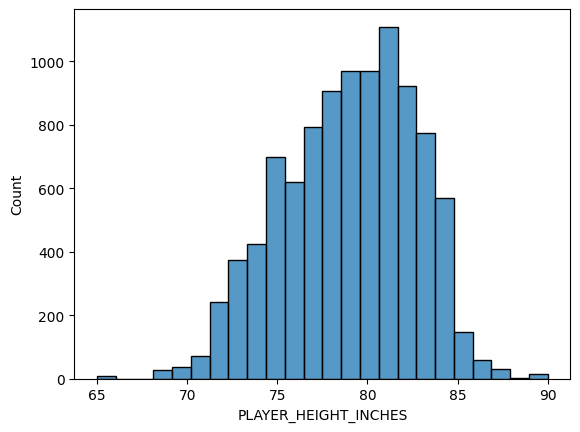

In [12]:
df_r =df[['PLAYER_ID','SEASON_ID', 'AGE', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 
    'OREB_PCT', 'DREB_PCT', 'USG_PCT', 'TS_PCT',]]

career_f = career_f[['PLAYER_ID', 'SEASON_ID', 'PLAYER_AGE', 'MIN', 
        'FGA_PM', 'FG_PCT', 'FG3A_PM', 'FG3_PCT', 'FTM_PM', #'STL_PM', 
        'BLK_PM', 'PF_PM',]]

sns.histplot(data=df_r, x="PLAYER_HEIGHT_INCHES", bins=len(df_r['PLAYER_HEIGHT_INCHES'].unique()))


Let's see some debatable attributes:

In [23]:
def plot_A_by_B(data=df_r, A='AGE', B='PLAYER_HEIGHT_INCHES'):
    x = sorted(data[B].unique())
    y = [data[data[B]==i][A].mean() for i in x] 

    plt.plot(x, y, color='black')
    plt.title(A + ' by ' + B)
    plt.xlabel(B)
    plt.ylabel(A)

def plot_A_by_B_and_C(data=df_r, A='OREB_PCT', B='PLAYER_HEIGHT_INCHES', C='AGE'):
    x1 = sorted(data[B].unique())
    x2 = sorted(data[C].unique())
    y1 = [data[data[B]==i][A].mean() for i in x1]
    y2 = [data[data[C]==i][A].mean() for i in x2]
    fig, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(10, 6))
    sns.lineplot(x=x1, y=y1, ax=ax[0])
    sns.lineplot(x=x2, y=y2, ax=ax[1])
    ax[0].set_aspect(1.0/ax[0].get_data_ratio(), adjustable='box'); ax[1].set_aspect(1.0/ax[1].get_data_ratio(), adjustable='box')
    ax[0].set_title(A + ' by ' + B);ax[1].set_title(A + ' by ' + C)
    ax[0].set_xlabel(B);ax[1].set_xlabel(C);ax[0].set_ylabel(A);ax[1].set_ylabel(A)

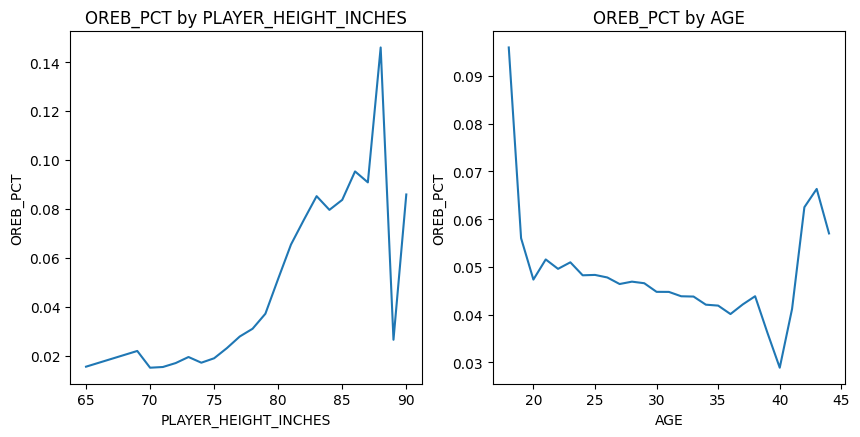

In [95]:
plot_A_by_B_and_C()

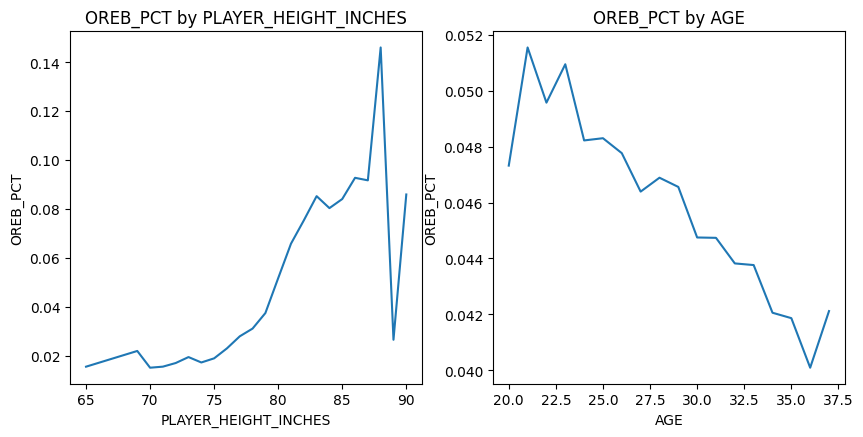

In [96]:
#Plot again, but with limited age range
plot_A_by_B_and_C(df_r[df_r['AGE'].isin(list(range(20,38))) ])

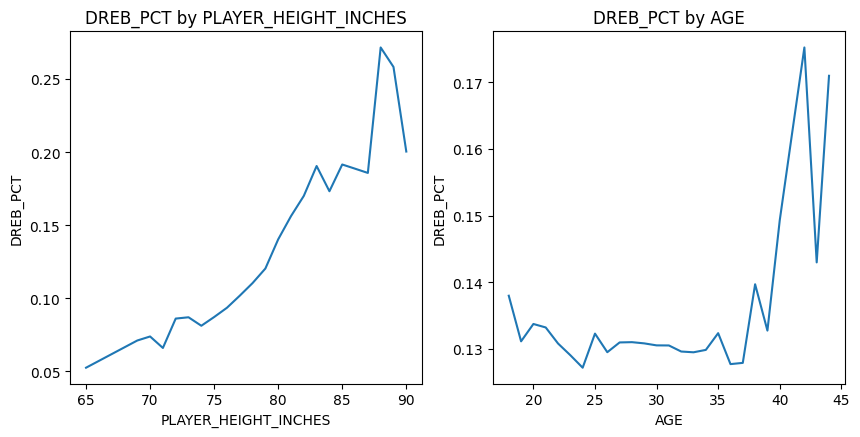

In [97]:
plot_A_by_B_and_C(A='DREB_PCT')

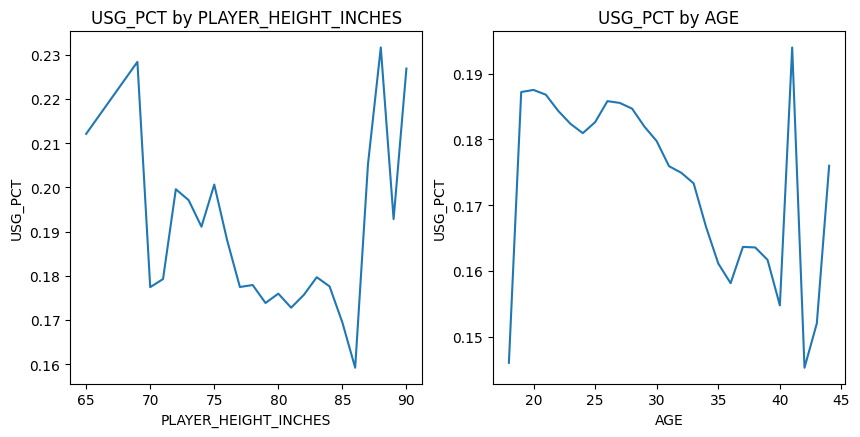

In [98]:
plot_A_by_B_and_C(A='USG_PCT')

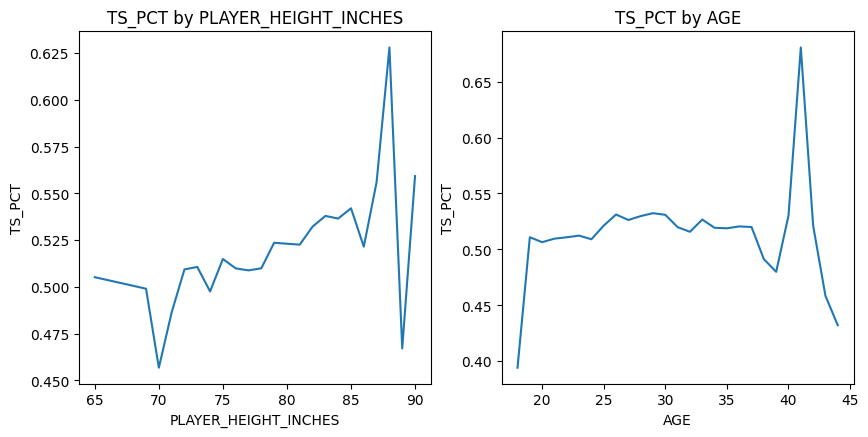

In [79]:
plot_A_by_B_and_C(A='TS_PCT')

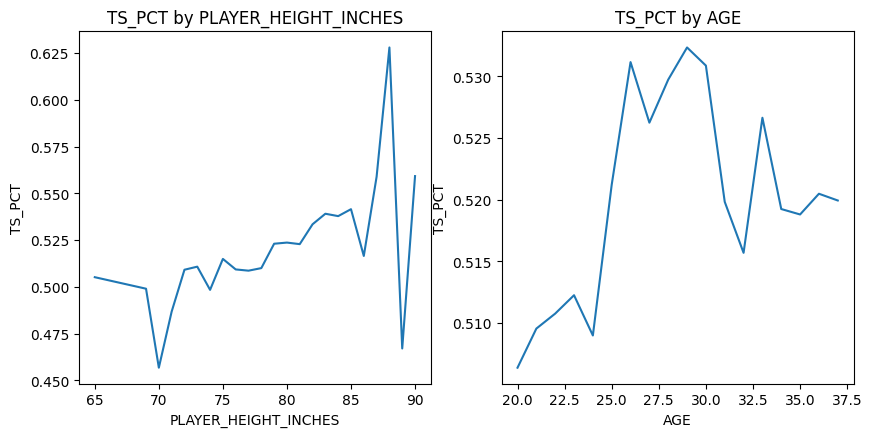

In [80]:
plot_A_by_B_and_C(df_r[df_r['AGE'].isin(list(range(20,38))) ], A='TS_PCT')

The plots further show that too old/young players have to be filtered out.<br>
USG_PCT does not seem to be a good predictor (well, there is trend, but so "bumpy", and it more correlates with age). <br>
True shot percentage is not correlated with age. There is some upwards trend with height, but it is not very strong. <br>

In [14]:
df_r = df_r[df_r['AGE'].isin(list(range(20,38))) ].reset_index(drop=True)
career_f = career_f[career_f['PLAYER_AGE'].isin(list(range(20,38))) ].reset_index(drop=True)

df_r = df_r.drop(columns=['USG_PCT', ])
df_r

,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT
0,1630639,2022-23,22.0,78.0,179.0,0.046,0.152,0.589
1,1631260,2022-23,23.0,77.0,190.0,0.016,0.105,0.607
2,203932,2022-23,27.0,80.0,235.0,0.086,0.136,0.617
3,1628988,2022-23,26.0,72.0,185.0,0.028,0.059,0.528
4,1630174,2022-23,23.0,77.0,215.0,0.033,0.119,0.566
...,...,...,...,...,...,...,...,...
9591,1628380,2019-20,22.0,83.0,250.0,0.095,0.149,0.538
9592,203897,2019-20,25.0,78.0,200.0,0.019,0.125,0.568
9593,1629668,2019-20,22.0,77.0,205.0,0.000,0.207,0.402
9594,1629015,2019-20,21.0,75.0,205.0,0.000,0.080,0.313


Let's "perfectly" combine the data:

In [15]:
ids_bio = df_r['PLAYER_ID'].unique()
ids_career = career_f['PLAYER_ID'].unique()
ids = np.intersect1d(ids_bio, ids_career)

df_r = df_r[df_r['PLAYER_ID'].isin(ids) ].reset_index(drop=True) #Don't need to do with career_f, it is the same as the intersection
#The above is not necessary anymore, but I kept it. We filter by id-season pair below

#Find all common id-season pairs
id_season_pairs_bio = (df_r[['PLAYER_ID', 'SEASON_ID']].to_numpy().tolist())
id_season_pairs_career = career_f[['PLAYER_ID', 'SEASON_ID']].to_numpy().tolist()
A = set(tuple(x) for x in id_season_pairs_bio); B = set(tuple(x) for x in id_season_pairs_career)
id_season_pairs = ([x for x in A & B])

df_r = df_r[df_r[['PLAYER_ID', 'SEASON_ID']].apply(tuple, axis=1).isin(id_season_pairs) ].reset_index(drop=True)
career_f = career_f[career_f[['PLAYER_ID', 'SEASON_ID']].apply(tuple, axis=1).isin(id_season_pairs) ].reset_index(drop=True)
data = pd.merge(df_r, career_f, on=['PLAYER_ID', 'SEASON_ID'], how='inner'); data = data.drop(columns=['PLAYER_AGE'])
data = (data.dropna()).reset_index(drop=True)
data

,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
0,1630639,2022-23,22.0,78.0,179.0,0.046,0.152,0.589,217.0,0.40553,0.662667,0.230415,0.266667,0.018433,0.0,0.101382
1,1631260,2022-23,23.0,77.0,190.0,0.016,0.105,0.607,345.0,0.362319,0.424,0.304348,0.419,0.011594,0.0,0.089855
2,203932,2022-23,27.0,80.0,235.0,0.086,0.136,0.617,2055.0,0.370316,0.564,0.084185,0.347,0.092944,0.024818,0.062774
3,1628988,2022-23,26.0,72.0,185.0,0.028,0.059,0.528,845.0,0.260355,0.418,0.104142,0.409,0.031953,0.014201,0.093491
4,1630174,2022-23,23.0,77.0,215.0,0.033,0.119,0.566,1816.0,0.32489,0.427,0.172907,0.366,0.065529,0.018722,0.129405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,1626195,2019-20,26.0,83.0,250.0,0.105,0.243,0.576,375.0,0.370667,0.532,0.058667,0.227,0.098667,0.018667,0.085333
8318,201163,2019-20,33.0,80.0,235.0,0.014,0.164,0.531,734.0,0.249319,0.404,0.16485,0.306,0.027248,0.016349,0.107629
8319,1627812,2019-20,27.0,72.0,178.0,0.011,0.085,0.528,530.0,0.354717,0.42,0.149057,0.304,0.067925,0.007547,0.071698
8320,1628380,2019-20,22.0,83.0,250.0,0.095,0.149,0.538,290.0,0.234483,0.471,0.065517,0.368,0.02069,0.017241,0.124138


### Problems and thoughts

Since data contains multiple season stats for most players, it's longitudinal data, that is "biased". It has to be decided how to handle this. I can combine all rows for each player, but then we'd lose the age attribute. Maybe what matters more than age in general is minimal_age, how old the player was when he got into the NBA. Another idea is renormalizing data based on age, but I think that'd result in bad results, but not sure. The simplest idea is just to look at players of the same age, but that'd result in too small input data. Also a problem for output: we'd have multiple seasons data for one player, so the classifier will need to guess a player's height multiple times, with different (seasonal) data. <br>

Other "discussion" is what to do with outliers in the target. I see that things get "weird" at height in inches 88+, but I guess it would part of the problem to predict the height of these players. <br>


### SHAP values from a random forest

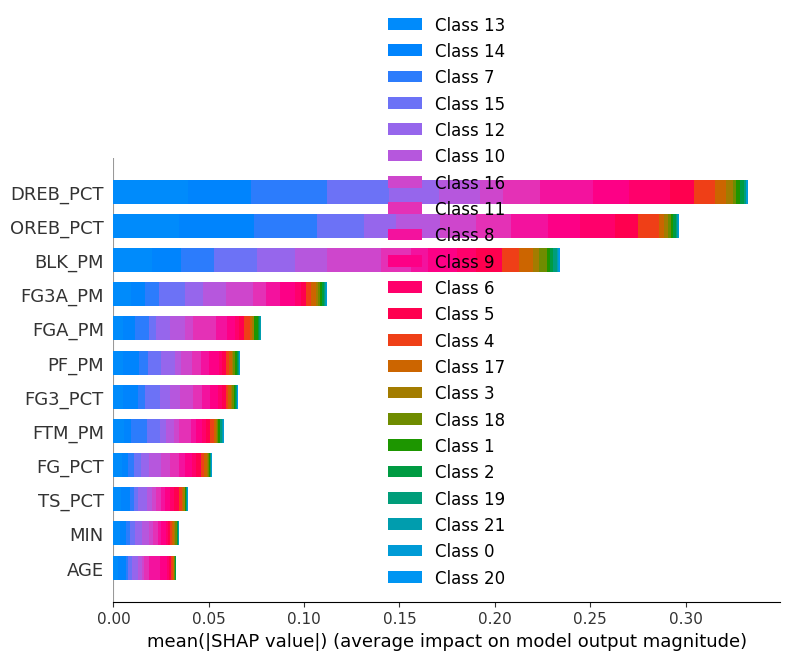

In [364]:
shap.initjs()
explainer = shap.TreeExplainer(clf_f)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

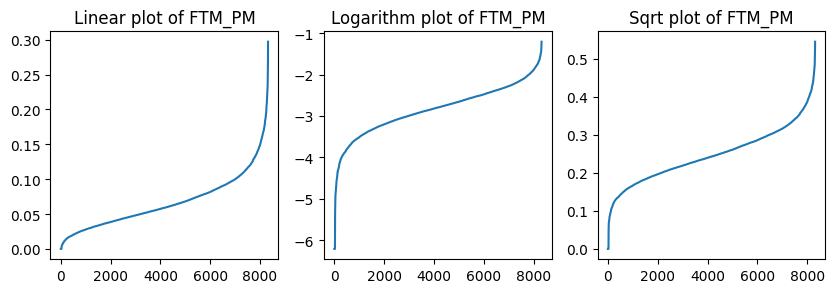

In [188]:
plot_in_row(data['FTM_PM'], "FTM_PM")

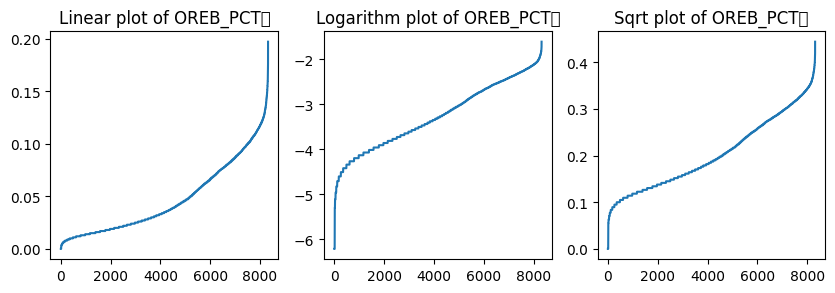

In [191]:
plot_in_row(data["OREB_PCT"], "OREB_PCT	")

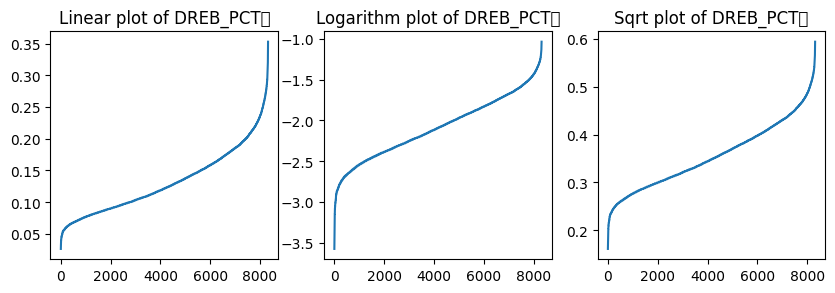

In [192]:
plot_in_row(data["DREB_PCT"], "DREB_PCT	")

For rebounds, logarithmic seems like a good choice.

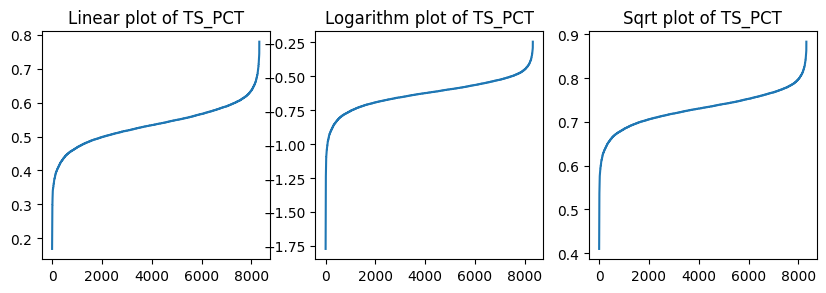

In [193]:
plot_in_row(data["TS_PCT"], "TS_PCT")

TS_PCT looks like an inverse of a sigmoid function. Let's try then applying this function on the values to hopefully get something linear:<br>


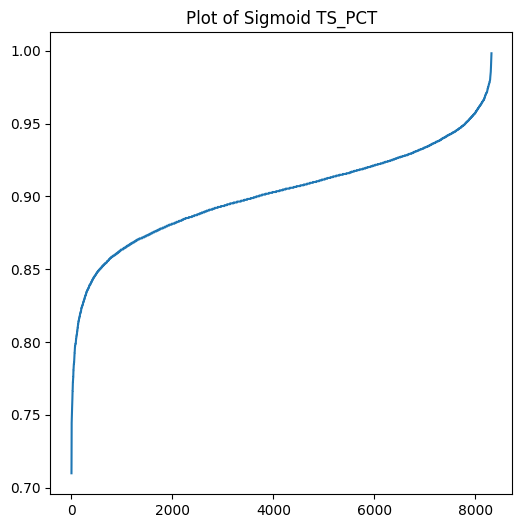

In [240]:
sigmoid_ts_pct = (1/(np.power(data["TS_PCT"], 3.6) +1)); # max = np.max(sigmoid_ts_pct); min = np.min(sigmoid_ts_pct);
#sigmoid_ts_pct_normalized = [(v-min)/(max-min) for v in sigmoid_ts_pct]
plot_ordered(sigmoid_ts_pct, "Sigmoid TS_PCT")
#plot_ordered(sigmoid_ts_pct_normalized, "Normalized Sigmoid TS_PCT")

It is something better, but not by much. So I will just keep it as it is.<br>
I saw curves similar to this be modeled with "Logarithmic Companding Curves", namely the μ-law and A-law curves. But it's not worth it to invest the time into it. I might just plot badly as I should plot things possibly not by (sorted) index. Also, I should have adjusted to the axis intersection value 1/2. <br>
https://www.allaboutcircuits.com/technical-articles/companding-logarithmic-laws-implementation-and-consequences/

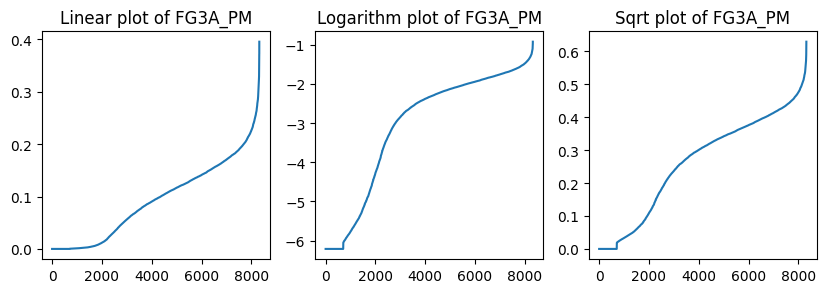

In [243]:
plot_in_row(data["FG3A_PM"], "FG3A_PM")

Interesting values, never seen anything like this. Assumably the square root plot is the most linear.

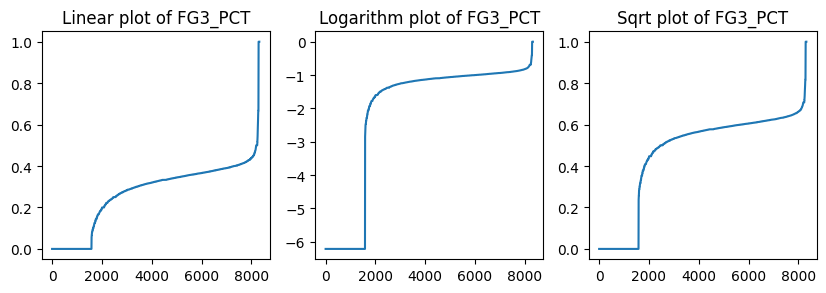

In [244]:
plot_in_row(data["FG3_PCT"], "FG3_PCT")

Super weird looking. In the first case, 0 and 1 values would cluster together because everything else varies too much from them, in the second and third one, only the 0 values would cluster. I cannot keep this as it is, has to be dropped.

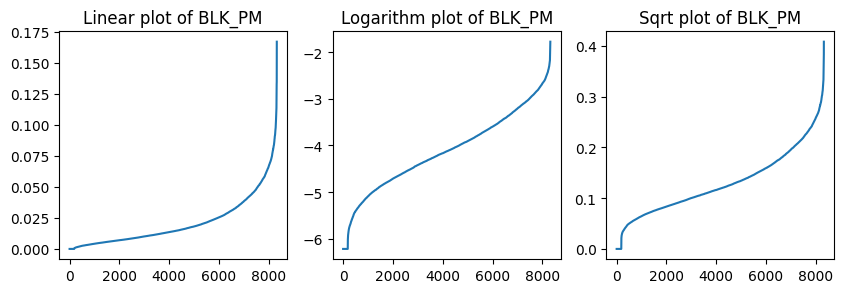

In [252]:
plot_in_row(data["BLK_PM"], "BLK_PM")

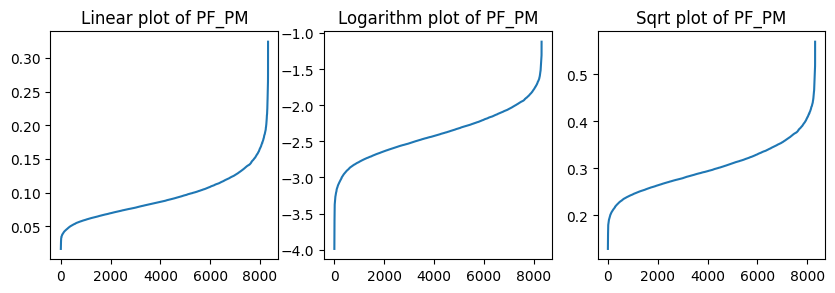

In [253]:
plot_in_row(data["PF_PM"], "PF_PM")

In [291]:
comparison = data.drop(columns=["PLAYER_ID", "SEASON_ID"])[0:0]
comparison = pd.concat([comparison, (data[model2.labels_ == 0].drop(columns=["PLAYER_ID", "SEASON_ID"]).mean()).to_frame().T], axis=0, ignore_index=True)
comparison = pd.concat([comparison, (data[model2.labels_ == 1].drop(columns=["PLAYER_ID", "SEASON_ID"]).mean()).to_frame().T], axis=0, ignore_index=True)
comparison = pd.concat([comparison, (data[model2.labels_ == 2].drop(columns=["PLAYER_ID", "SEASON_ID"]).mean()).to_frame().T], axis=0, ignore_index=True)
comparison = pd.concat([comparison, (data[model2.labels_ == 3].drop(columns=["PLAYER_ID", "SEASON_ID"]).mean()).to_frame().T], axis=0, ignore_index=True)
comparison = pd.concat([comparison, (data[model2.labels_ == 4].drop(columns=["PLAYER_ID", "SEASON_ID"]).mean()).to_frame().T], axis=0, ignore_index=True)
comparison

,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
0,27.151974,74.698347,193.802571,0.018574,0.084973,0.520873,1574.474288,0.339305,0.41656,0.123209,0.338609,0.063738,0.006211,0.077583
1,26.812934,82.277778,247.46441,0.090697,0.180128,0.544796,1346.690972,0.283458,0.508876,0.007535,0.106412,0.069336,0.039358,0.122713
2,26.741176,78.979412,217.617647,0.03462,0.118832,0.524461,1397.513445,0.297171,0.423767,0.11791,0.324747,0.04881,0.015024,0.087824
3,26.584962,82.369925,239.308271,0.05874,0.176638,0.551629,1598.27218,0.379285,0.457068,0.123768,0.336471,0.077632,0.032896,0.100516
4,26.432704,77.444025,210.74717,0.025161,0.115992,0.552738,2098.29434,0.463905,0.443975,0.160244,0.351097,0.109838,0.013649,0.071753


Gathered from a clustering: <br>
Let's evaluate the 5 groups:<br>
Dendogram: Group 1 is the most disassociated group. Groups 2, 3, 4 are (in comparison) fairly "similar", Group 0 is also quite disassociated. <br>
**Age**: Mostly similar. Seems like it did not matter indeed.<br>
**Height, Weight**: Group 1 and 3 are the big guys (height similar, group 1 is a bit heavier), group 0 is lightweight, group 2 and 4 are medium. Group 4 is also somewhat more in the lighter category. <br>
**Rebounds**: We can indeed see that the two "big" groups have substantially more rebounds than the other groups. What makes a difference is that whilst their defensive rebound percentages are quite similar, the offensive ones are not: the big big group (group 1) has more than 150% of offensive rebounds compared to the group 3.<br>
**Shooting percentage**: Nearly similar with the exception that small guys and group 2 does a little less well.<br>
**Minutes**: Group 4 plays a lot, much more than other groups. The big big guys play the least, along with group 2. Little guys and group 3 play similarly much. <br>
**FGA_PM**: Group 4 has exceptional stats. Group 1 and 2 do the least, small guys also do not try much. <br>
**FG_PCT**: Small guys and group 2 do worst, the big big guys stand out. Group 4 do almost as well as group 3. <br>
**FG3A_PM**: Group 4 does the most by quite an amount, small guys do as much as group 3, I expected more from them. But the big big guys almost never throw a 3-pointer. I highly assume they are players from one position, that is close to the basket. <br>
**FG3_PCT**: Similar statistics to all groups except the big big guys. <br>
**FTM_PM**: Group 4 does best again, and group 2 do worst. <br>
**BLK_PM**: The big guys block most, small guys almost never, once every 160 minutes. <br>
**PF_PM**: The big guys foul the most but considerably low amounts, group 4 does best. <br>

Takeaway:<br>
- The cluster analysis actually separated fairly closely to positions. Big big guys are surely centers, group 3 are power forwards, and small guys are supposed to be the point guards. But since point guards, shooting guards and small fowards (remaining positions) are so versatile that the cluster algorithm separated thse players into rather "small guys, bad and good players" from what I see from the stats. <br>